# Анализ данных о продажах игр для планирования рекламной кампании интернет-магазина

<a id="describe"></a> 
# Описание

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Задача:**
необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Исходные данные.**

Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед вами данные из открытых источников до 2016 года (за 2016 год могут быть неполными).

**Описание данных:**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Содержание

[Описание](#describe)

[1. Изучим общую информацию](#1)

[2. Подготовка данных](#2)

[3. Исследовательский анализ данных (EDA)](#3)  

[4. Портрет пользователя каждого региона](#4)

[5. Проверка гипотез](#4)

[6. Общий вывод](#5) 

In [1]:
#установим библиотеку phik
! pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik
from scipy import stats

<a id="1"></a> 
# 1. Изучим общую информацию о данных 

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') #сохраним датасет в переменной data

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
data.info() #посмотрим сводную информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**
датасет из 16715 строк. Датасет содержит пропуски в столбцах Name(2 шт),Genre(2 шт), Year_of_Release, Critic_Score, User_Score, Rating. Нужно подробнее рассмотреть тип даннных в столбцах Year_of_Release и в столбцах с рейтингами Critic_Score и User_Score. 

<a id="2"></a> 
# 2. Подготовка данных

In [7]:
data.columns = data.columns.str.lower() #приведем название стобцов к нижнему регистру 

In [8]:
data.duplicated().sum()

0

Данные не содержат явные дубликаты

In [9]:
data['year_of_release'].describe() #изучим средние значения и стандартные отклонения

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Датасет содержит в том числе исторические данные об играх с 1980 года по 2016 год.

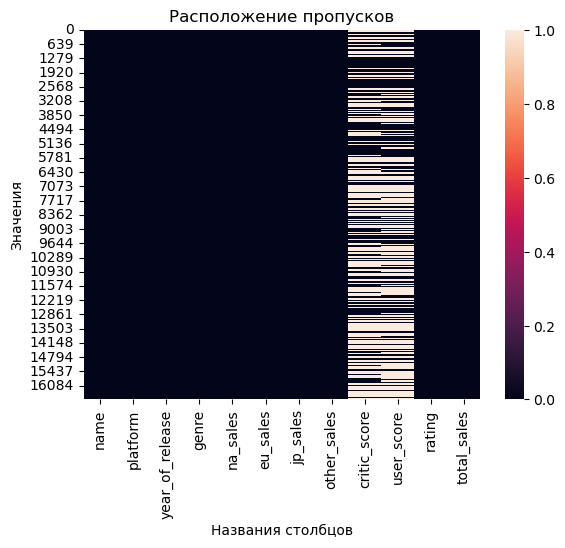

In [121]:
#построим хитмеп, чтобы наглядно рассмотреть как именнно распологались пропуски
sns.heatmap(data.isna())
plt.title('Расположение пропусков')
plt.xlabel('Названия столбцов')
plt.ylabel('Значения')
plt.show()

Рассмотрев наши данные можно отметить, что пропуски critic_score и user_score имеют систематический характер. Возможно, что это связано с тем, что наши данные из открытых источников. Также, наверное это может быть нормально, когда на некоторые игры нет экспертной(еще и определенной организации) или пользовательской оценки

**critic_score**

Рассмотрим пропуски более подробно

In [12]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data['critic_score'].isna().sum()

8578

In [14]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Пропусков очень много, заполнить их средним рейтингом по жанру или платформе считаю плохим вариантом, потому что игры это что-то уникальное и усреднять значения будет неверно. Удалять такое количество данных тоже нельзя, поэтому оставим как есть 

In [15]:
#сменим тип данных на int
data['critic_score'] = data['critic_score'].astype('Int64')

Для удобства сменим тип данных на int, чтобы работать было более удобно. Данные представляют собой числа без дробной части и не требуют такой точности, а еще целочисленный тип удобнее для восприятия    

In [16]:
data['critic_score'].value_counts() 

70    256
71    254
75    245
78    240
73    238
     ... 
20      3
21      1
17      1
22      1
13      1
Name: critic_score, Length: 82, dtype: Int64

**user_score**

In [17]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [18]:
data['user_score'].isna().sum()

6701

Удалять такое количество данных тоже нельзя, поэтому оставим как есть

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - 'подлежит определению', те оценок у это игры нет. Поменяем значения tbd на Nan

In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [21]:
data.loc[data['user_score'] == 'tbd', 'user_score'] #check

Series([], Name: user_score, dtype: object)

In [22]:
data['user_score'].isna().sum()

9125

Количество пропусков увеличилось, но удалять такое количество данных тоже нельзя, поэтому оставим как есть. По таким же причинам не будем пропуски как-то заполнять 

In [23]:
#сменим тип данных на float
data['user_score'] = data['user_score'].astype('float')

Поменяем тип данных, чтобы использовать методы, которые доступны только для числовых данных

**rating**

Рассмотрим пропуски в rating

In [24]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [25]:
data['rating'].isna().sum()

6766

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Также поступим и с пропусками в rating, но заполним заглушкой unknown, чтобы не ловить пропуски при анализе и поменять тип данных на str

In [27]:
data['rating'] = data['rating'].fillna('unknown') 

Если посмотреть в интернете, что такое рейтинг ESRB, то узнаем, что это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто игры выпускаются не только для Северной Америки  .

In [28]:
data['rating'].value_counts() #check

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [29]:
#сменим тип данных на float
data['rating'] = data['rating'].astype('str')

Поменяем тип данных, чтобы использовать методы, которые поддерживают операции над строками

**year_of_release**

Рассмотрим пропуски в year_of_release

In [30]:
data['year_of_release'].isna().sum()

269

In [31]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Пропусков в столбце year_of_release немного, удалим их

In [32]:
data.shape

(16715, 11)

In [33]:
data = data.dropna(subset=['year_of_release'])

In [34]:
data.shape

(16446, 11)

In [35]:
data['year_of_release'] = data['year_of_release'].astype('int')

поменяем тип данных на int, чтобы год выглядил нормально

In [36]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Количество игры ежегодно растет. В 1980 году в наших данных всего 9 игры, а в лучшие годы количество игр было: 2008 году    1427;
2009 году   1426;
2010 году   1255.

**name**

Удалим пропуски в столбце name

In [37]:
data.shape

(16446, 11)

In [38]:
data = data.dropna(subset=['name'])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

In [39]:
data.shape

(16444, 11)

Отдельно посмотрим количество уникальных значений и дубликатов в столбце name

In [40]:
data['name'] = data['name'].str.lower() #переведем названия игр в строчный

In [41]:
#уникальные названия игр
len(data['name'].unique())

11426

In [42]:
#дубликаты в названии игр
data['name'].duplicated().sum()

5018

In [43]:
data[data.duplicated(subset=['name'])] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M
35,call of duty: black ops ii,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M
37,call of duty: modern warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M
41,call of duty: black ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,men in black ii: alien escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,<NA>,NaN,T
16709,score international baja 1000: the official game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,unknown
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,unknown


In [44]:
data[data['name'] == 'summer athletics: the ultimate challenge'] #check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8045,summer athletics: the ultimate challenge,PS2,2008,Sports,0.00,0.00,0.0,0.18,<NA>,NaN,E
14477,summer athletics: the ultimate challenge,X360,2008,Sports,0.02,0.01,0.0,0.00,48,NaN,E


Игры могут иметь одинаковое название, но различаются по году, а еще по платформе

Проверим неявные дубликаты одновременно по имени, платформе и году релиза

In [45]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Нашлась одна игра, удалим дубли

In [46]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

In [47]:
data[data['name'] == 'madden nfl 13'] #check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
3986,madden nfl 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,<NA>,7.3,E
5887,madden nfl 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,madden nfl 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E


In [48]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])] #check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**genre**

In [49]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [50]:
data['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

**platform**

In [51]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [52]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Топ-5 по популярности среди платформ является:
PS2     2127;
DS      2121;
PS3     1306;
Wii     1286;
X360    1232.


**Cуммарные продажи во всех регионах**

In [53]:
#добавим столбец total_sales
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


In [54]:
#изучим средние значения и стандартные отклонения
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548,0.536055
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429,1.558828
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


В наших данных игры представлены с 1980 по 2016 годы. В столбцах с данными есть выбросы, так как среднее значение сильно отличается от медианы. Максимальное значение проданных копий игры в регионах: Северной Америки(41.3 млн шт), а в Европе(28.96 млн шт), в Японии(10.2 млн шт), в других странах(10.57млн шт). Средний рейтинг от критиков для игр составил 68/100(медиана 71), а от пользователей 7.1/10(медиана 7.5). Максимальный рейтинг от критиков для игры составил 98/100, а от пользователей 9.7/10. Минимальный рейтинг от критиков для игры составил 13/100, а от пользователей 0. 

**Выводы:**
удалили небольшое количество пропусков в столбцах name и year_of_release. Большое количество пропусков в столбцах  critic_score, user_score оставили, а в столбце rating заполнили зглушкой 'unknown'. Пропуски, вероятно, связаны с тем, что наши данные из открытых источников. Также это может быть из-за того, что на некоторые игры нет экспертной оценки, рейтинга(еще и определенной организации) или пользовательской оценки. 

Чаще всего выходили игры который получали рейтинг от организации ESRB:
E          3990 игр;
T          2961 игры;
M          1563 игры

<a id="3"></a> 
# 3. Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы**

In [56]:
games_per_year = data.groupby('year_of_release')['name'].count().reset_index().sort_values(by='name', 
                                                                                           ascending=False)
games_per_year

,year_of_release,name
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


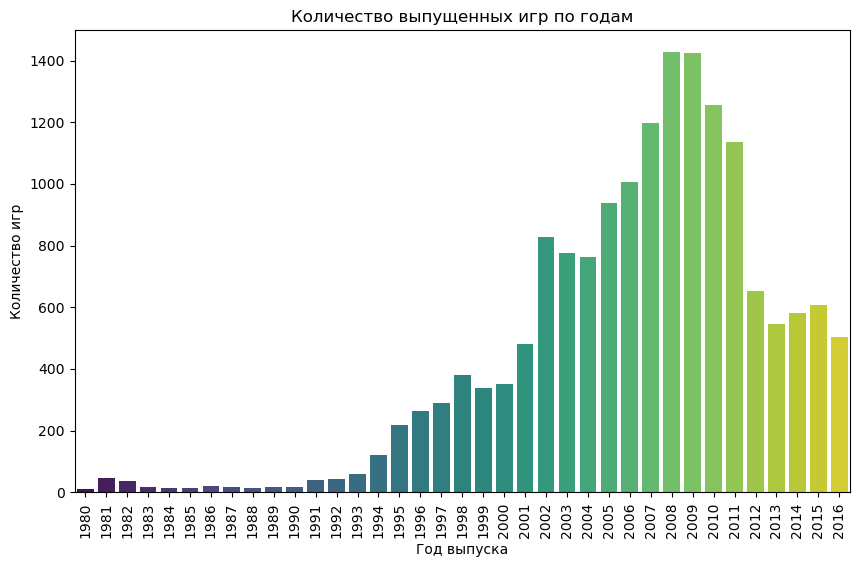

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year_of_release', y='name', data=games_per_year, palette='viridis')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)
plt.show()

Количество игры ежегодно растет. В 1980 году в наших данных всего 9 игры, а в лучшие годы количество игр было в период с 2008 по 2011 годы: 2008 году 1427; 2009 году 1426; 2010 году 1255. Значительный рост количества заметен в период после 1994 года и 2002 года.

**Количество игр для разных платформ за все время**

In [58]:
data.groupby('platform')['name'].count().sort_values().reset_index().sort_values(by='name', ascending=False)

,platform,name
30,PS2,2127
29,DS,2121
28,PS3,1305
27,Wii,1286
26,X360,1232
25,PSP,1193
24,PS,1190
23,PC,957
22,GBA,811
21,XB,803


Топ-5 по количеству игр для платформ является:
PS2     2127;
DS      2121;
PS3     1306;
Wii     1286;
X360    1232.


**Посмотрим как менялись продажи игр по платформам**

Платформы с наибольшими суммарными продажами

In [59]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [60]:
#устраним ошибку для игры, у которой неверно указан год выхода
data.loc[data['name'] == 'strongest tokyo university shogi ds', 'year_of_release'] = 2010

In [61]:
#выбераем топ-5 платформ 
top_platforms = data.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Платформы с наибольшими суммарными продажами является: PS2     1233.56;
X360     961.24;
PS3      931.34;
Wii      891.18;
DS       802.78

In [62]:
#оставим только те значения, где значение в столбце 'platform' содержится в списке top_platforms
top_platforms_data = data[data['platform'].isin(top_platforms)]
top_platforms_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,unknown,24.67
11,mario kart ds,DS,2005,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
13,wii fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
14,kinect adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82


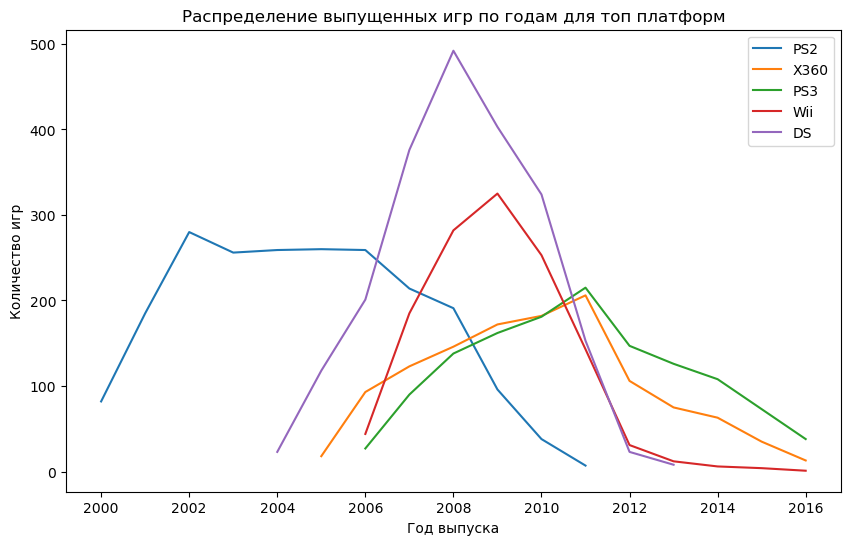

In [63]:
#Построим распределения по годам для каждой топ-платформ
plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    platform_data.groupby('year_of_release')['name'].count().plot(label=platform)

plt.title('Распределение выпущенных игр по годам для топ платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend()
plt.show()

Получается, что в среднем топ платформы 'живут' около 8-10 лет с пиком выпущенных игр в середине цикла жизни платформы. Также понятно, что при выходе следуещего поколения платформы, а старое постепенно становится все менее актуальным

Определим срок жизни платформы

In [64]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Однако, если анализируется текущее состояние рынка с целью принятия решений о стратегии нашего интернет-магазина для закупок или проведения маркетинговых кампаний, то данные за более ранние периоды могут быть менее важными. В этом случае более актуальными будут данные за последние несколько лет. Возьмем данные от 2013 года(перио за 4 года), так как тогда появились новые платформы.

**Рассмотрим данные за соответствующий актуальный период с 2013 года**

In [65]:
#создадим новую переменную new_data для дальнейшего анализа
new_data = data.query("year_of_release >= 2013")
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [66]:
new_data.tail() #check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16703,strawberry nauts,PSV,2016,Adventure,0.0,0.0,0.01,0.0,<NA>,NaN,unknown,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.0,0.0,0.01,0.0,<NA>,NaN,unknown,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.0,0.0,0.01,0.0,<NA>,NaN,unknown,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.0,0.0,0.01,0.0,<NA>,NaN,unknown,0.01
16714,winning post 8 2016,PSV,2016,Simulation,0.0,0.0,0.01,0.0,<NA>,NaN,unknown,0.01


In [67]:
new_data.info() #check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 229.0+ KB


В новой таблице new_data 2233 строки с пропусками в critic_score и user_score

# 3.2 Анализ периода с 2013 года 

**Количество игр для разных платформ c 2013 года**

In [68]:
new_data.groupby('platform')['name'].count().sort_values().reset_index().sort_values(by='name', ascending=False)

,platform,name
10,PS4,392
9,PSV,358
8,PS3,345
7,3DS,303
6,XOne,247
5,PC,189
4,X360,186
3,WiiU,115
2,PSP,67
1,Wii,23


Топ-5 по количеству игр для платформ с 2013 года является: PS4(392); PSV(PS Vita 358); PS3(345);3DS(303); XOne(247)

In [69]:
top_platforms_new = new_data.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()
top_platforms_new

['PS4', 'PS3', 'XOne', '3DS', 'X360']

In [70]:
#оставим только те значения, где значение в столбце 'platform' содержится в списке top_platforms_new
top_platforms_new_data = new_data[new_data['platform'].isin(top_platforms_new)]
top_platforms_new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


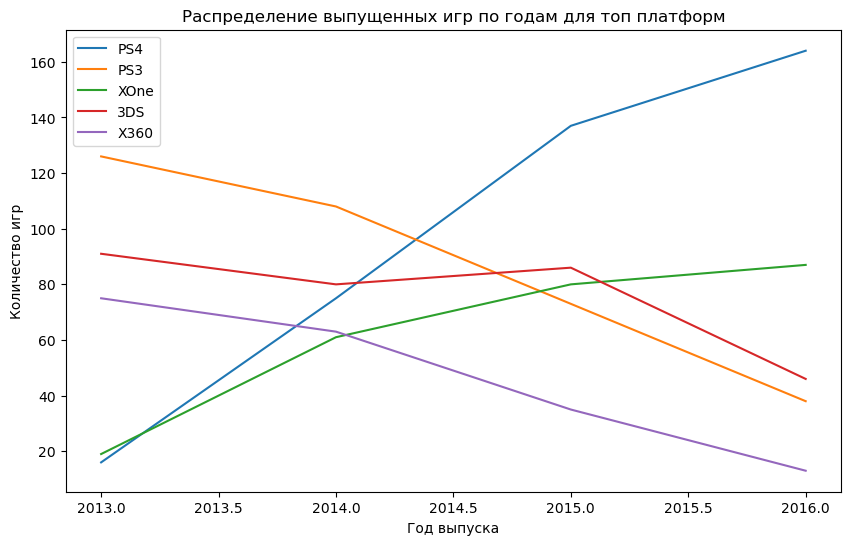

In [71]:
#Построим распределения по годам для топ-платформ
plt.figure(figsize=(10, 6))
for platform in top_platforms_new:
    platform_data = top_platforms_new_data[top_platforms_new_data['platform'] == platform]
    platform_data.groupby('year_of_release')['name'].count().plot(label=platform)

plt.title('Распределение выпущенных игр по годам для топ платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend()
plt.show()

Рассматривая количество игр среди топ платформ можно отметить смену поколений платформ. После обновления в 2013 году ежегодно растет кол-во игр для PS4 и XOne, а а для остальных плаформ количество игры постепенно ежегодно снижается

**Рассмотрим какие платформы лидируют по продажам**

Рассмотрим суммарные продажи по каждой платформе в период с 2013 по 2016 годы 

In [72]:
sales_by_platform_year = pd.pivot_table(new_data, index=['platform','year_of_release'], 
                         values='total_sales', aggfunc = 'sum')
sales_by_platform_year

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

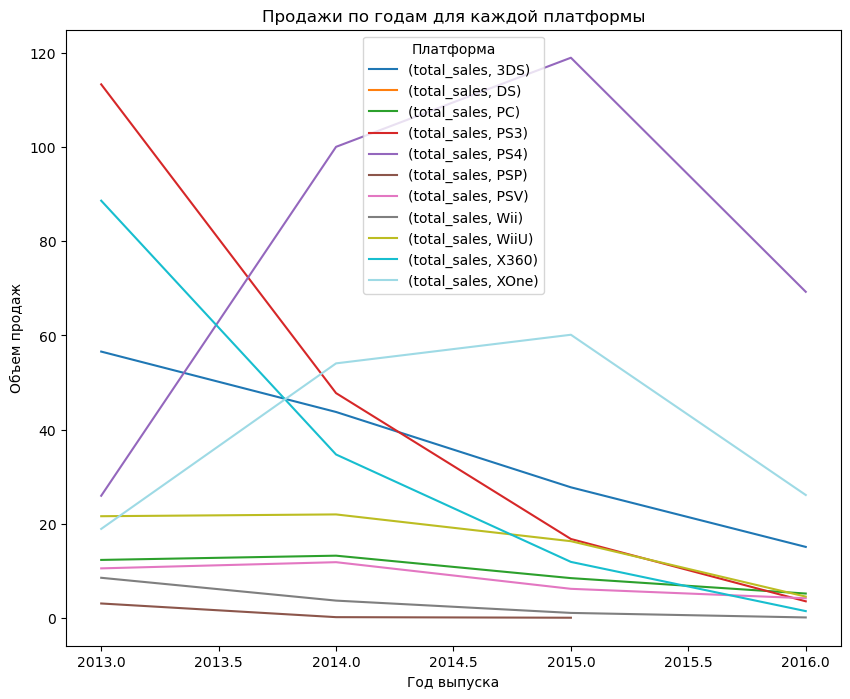

In [73]:
#построеним график продаж по годам для каждой платформы
sales_by_platform_year.unstack('platform').plot(figsize=(10, 8), colormap='tab20')
plt.title('Продажи по годам для каждой платформы')
plt.xlabel('Год выпуска')
plt.ylabel('Объем продаж')
plt.legend(title='Платформа')
plt.show()

Снижение продаж в 2016 году для PS4 и XOne можно объяснить тем, что у нас неполные данные за 2016 год. Суммарные продажи почти для всех снижаются, но для PC, WiiU и 3ds продажи стагнируют и не падают, хотя и объем их продаж низкий.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

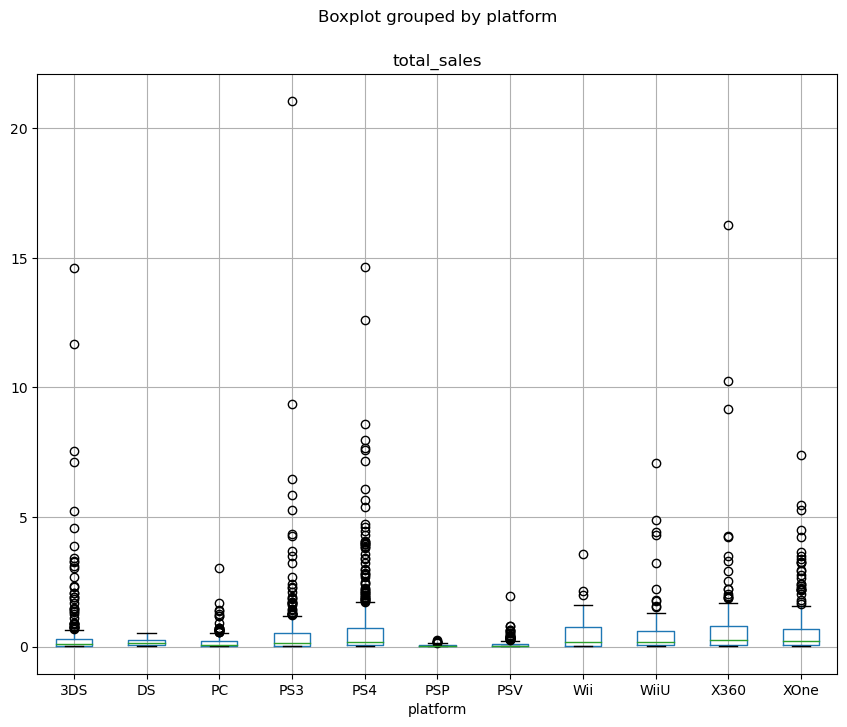

In [74]:
new_data.boxplot(column = 'total_sales', 
                 by ='platform', figsize=(10, 8)); #построим boxplot для total_sales с разбивкой по platform

Па графику можно понять глобальную прибыль для всех платформ. Наибольшая прибыль на платформах PS4, X360, XOne, Wii, PS3. Также можно отметить, что наибольшее количество выбросов, то есть каких-то наиболее популярных или более дорогих игр на платформах PS4, XOne, PS3, 3DS, X360. При этом топ по мединным значениям выглядит точно также, меняются местами только платформы X360 и PS4

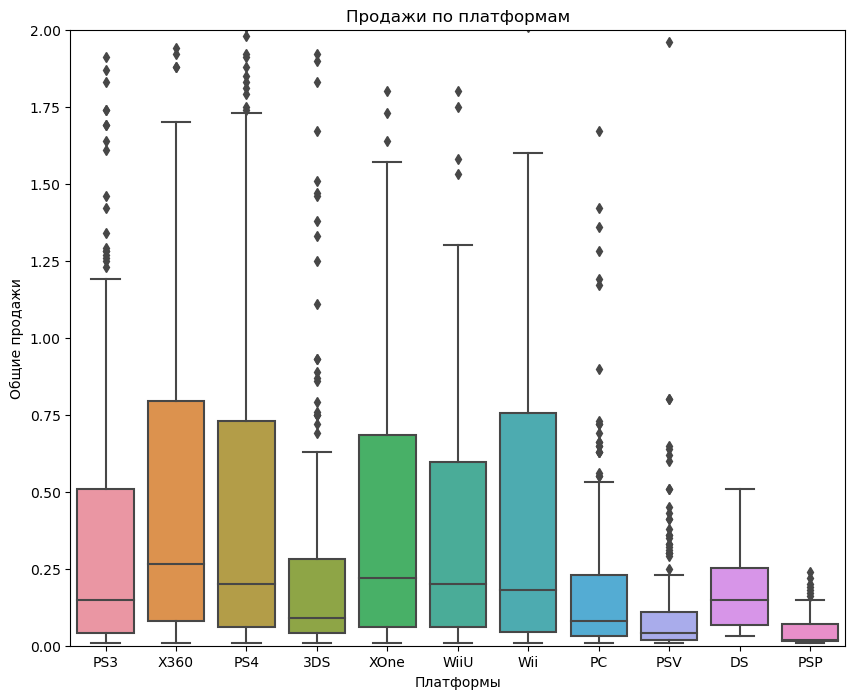

In [75]:
plt.figure(figsize=(10, 8))
sns.boxplot(y="total_sales", x="platform", data=new_data.reset_index())
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 2)  # Установка пределов по оси y
plt.show()

В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Наиболее перспективной и актуальной для оценки исходя из наших задач является плтформа PS4

In [76]:
#создадим новую переменную data_ps
data_ps = new_data[new_data['platform'] == 'PS4']
data_ps.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


In [77]:
data_ps.shape

(392, 12)

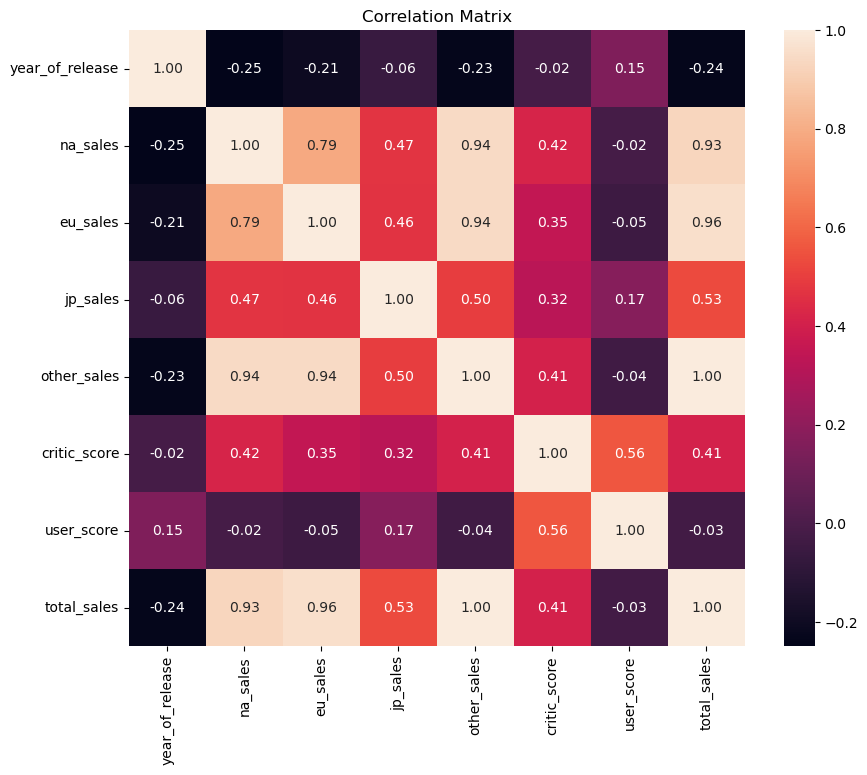

In [78]:
#Вычисление матрицы корреляций для data_ps
correlation_matrix = data_ps.corr()

#Создание тепловой карты (heatmap) для отображения матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

interval columns not set, guessing: ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']


/Users/vladimirseveruhin/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable platform for analysis 1. Dropping this column
  warnings.warn(


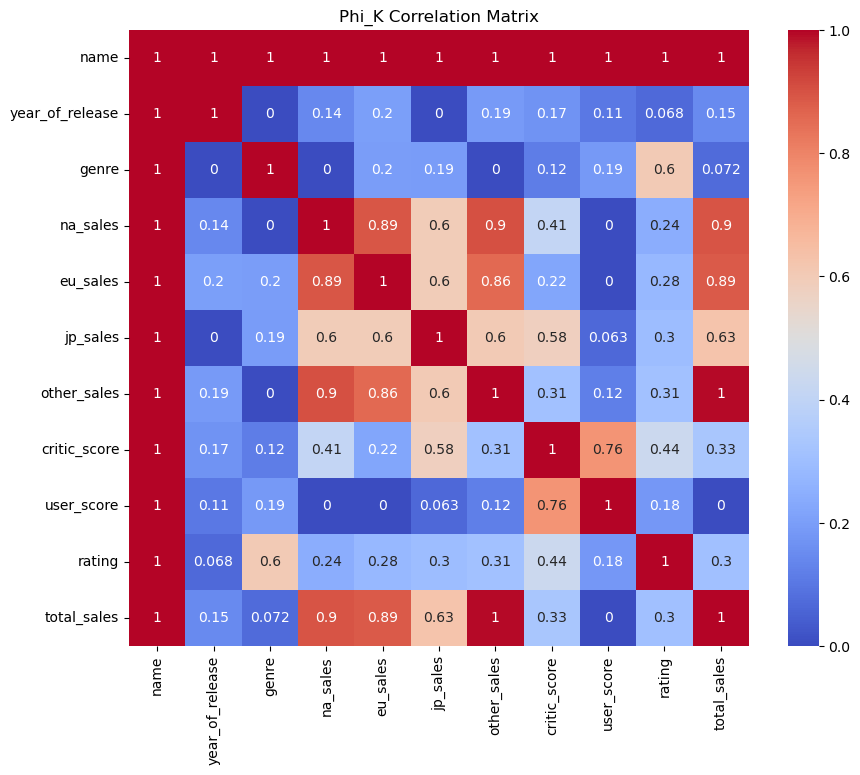

In [79]:
#Вычисление матрицы корреляции с использованием phik
corr_matrix = data_ps.phik_matrix()

#Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Рассматрев корреляцию для оценки влияния отзывов пользователей(0) и критиков(0.33) на продажи игр на платформе PS4 можно предположить, что влияния отзывов и рейтинга на продажи в целом нет, потому что корреляция слишком низкая. Но исключением является регион Япония, где отзывы критиков влияют на продажи(0.58) и для региона Северной Америки в меньшей степени(0.41). Также никакого влияния на продажи не оказывает рейтинг игр и жанр игр.  

Для интереса рассмотрим отличаются ли результаты, если мы рассмотрим корреляцию для всех платформ

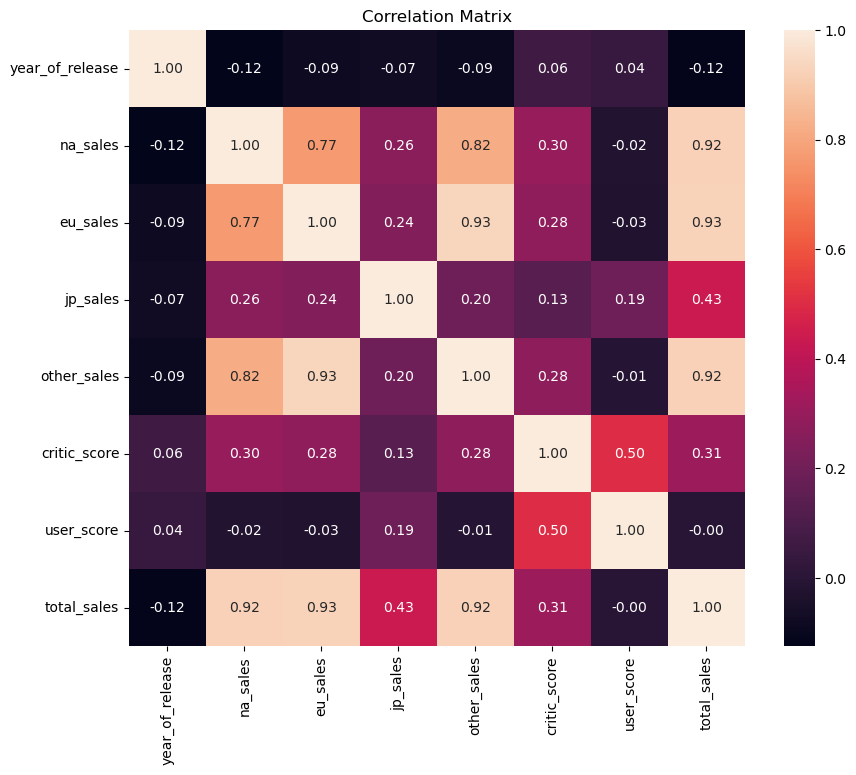

In [80]:
#Вычисление матрицы корреляций 
correlation_matrix = new_data.corr()

#Создание тепловой карты (heatmap) для отображения матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

interval columns not set, guessing: ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']


/Users/vladimirseveruhin/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1263. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


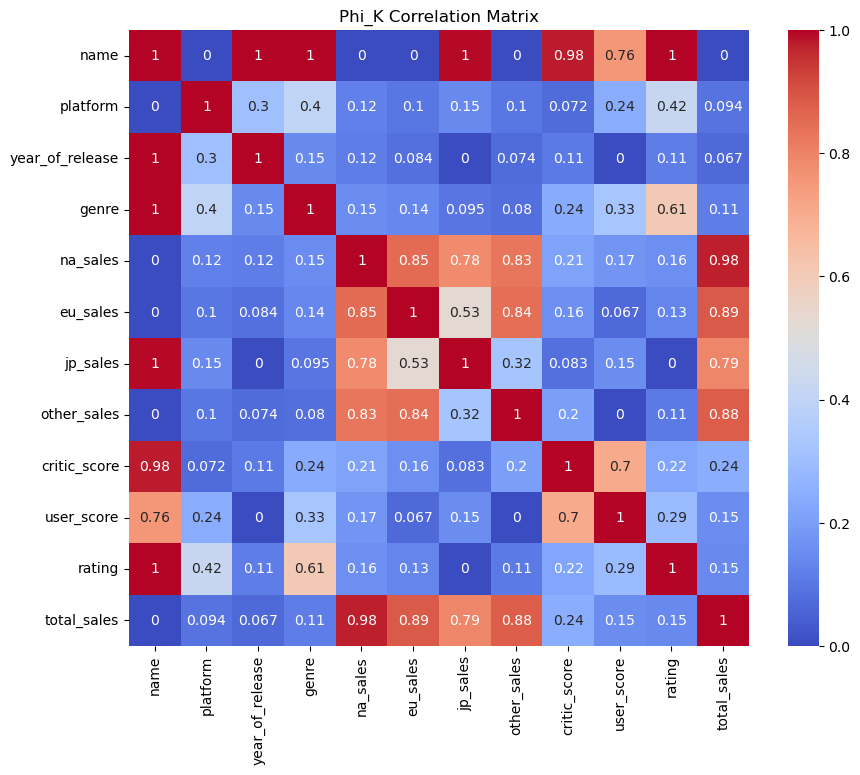

In [81]:
# Вычисление матрицы корреляции с использованием phik
corr_matrix = new_data.phik_matrix()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Результаты корреляции для всех платформ не отличаются от прошлых результатов для платформы PS4

**Построим диаграмму рассеяния между отзывами пользователей и критиков и продажами для платформы PS4**

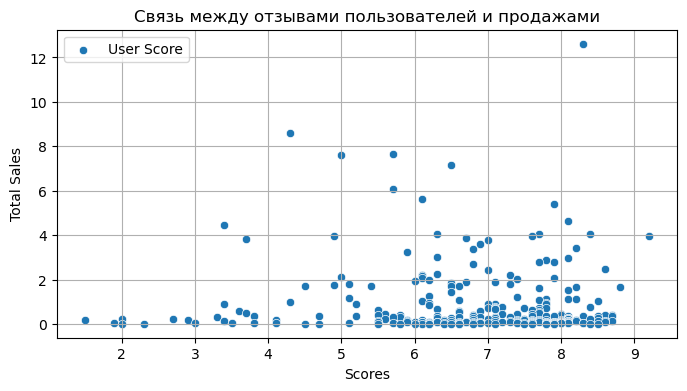

In [82]:
#Отобразим диаграмму рассеяния
plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='total_sales', data=data_ps, label='User Score')

plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('Связь между отзывами пользователей и продажами')
plt.legend()
plt.grid(True)
plt.show()

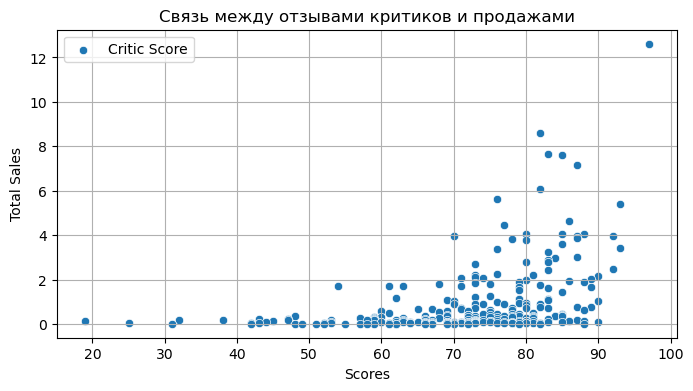

In [83]:
#Отобразим диаграмму рассеяния
plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='total_sales', data=data_ps, label='Critic Score')

plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('Связь между отзывами критиков и продажами')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 600x400 with 0 Axes>

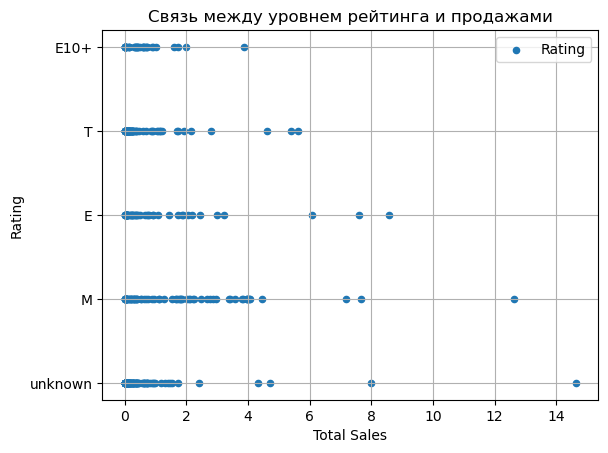

In [84]:
#Отобразим диаграмму рассеяния
plt.figure(figsize=(6, 4))
data_ps.plot.scatter(x='total_sales', y='rating', label='Rating')
plt.xlabel('Total Sales')
plt.ylabel('Rating')
plt.title('Связь между уровнем рейтинга и продажами')
plt.legend()
plt.grid(True)
plt.show()

Можно сказать, что результаты не сильно отличаются от оценки корреляции. На диаграмме рассеяния между продажами для платформы PS4 и отзывами пользователей и рейтингами можно отметить небольшую зависимость измнения выручки при более высоких оценках. Более четкие взаимосвязи есть между продажами и отзывами критиков. 

Сделаем цикл для построения диаграмм рассеяния и расчета корреляции по каждой платформе и по каждому виду отзывов.

Расчет по Платформе 3DS


user_score     0.241504
total_sales    1.000000
Name: total_sales, dtype: float64

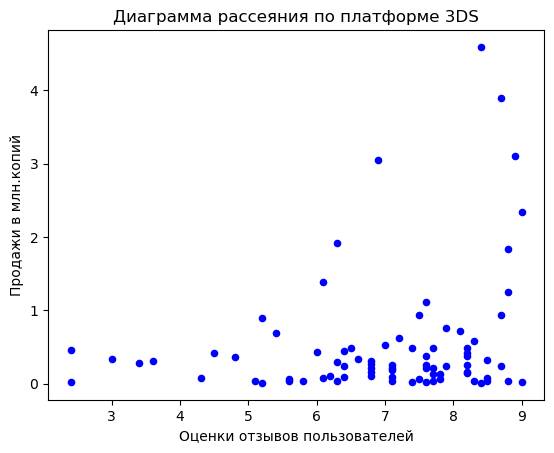

critic_score    0.357057
total_sales     1.000000
Name: total_sales, dtype: float64

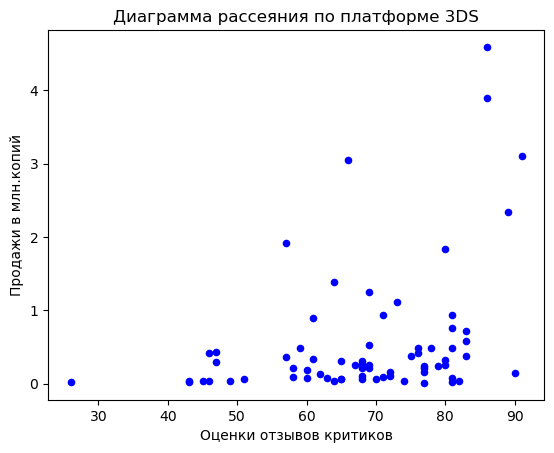

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.093842
total_sales    1.000000
Name: total_sales, dtype: float64

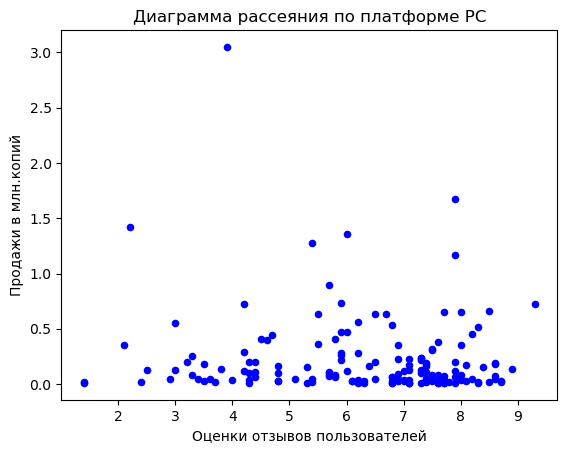

critic_score    0.19603
total_sales     1.00000
Name: total_sales, dtype: float64

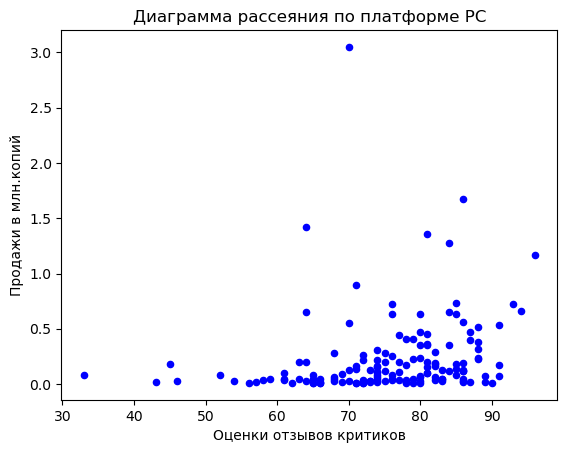

Расчет по Платформе PS3


user_score     0.002394
total_sales    1.000000
Name: total_sales, dtype: float64

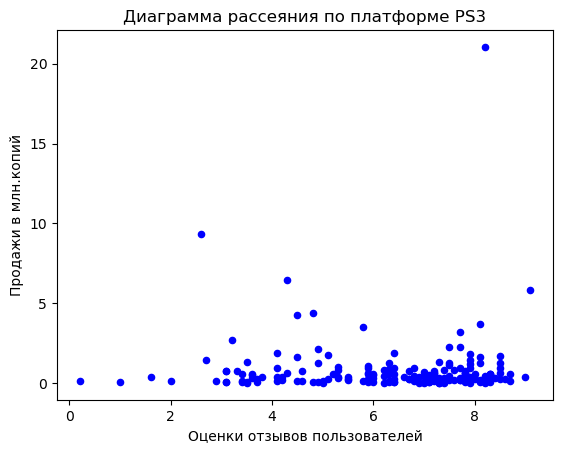

critic_score    0.334285
total_sales     1.000000
Name: total_sales, dtype: float64

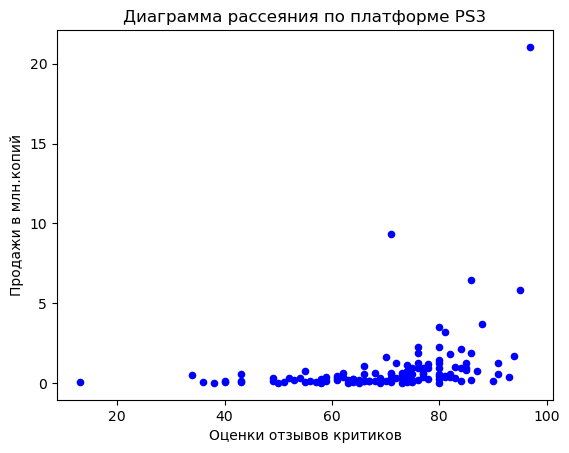

Расчет по Платформе PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

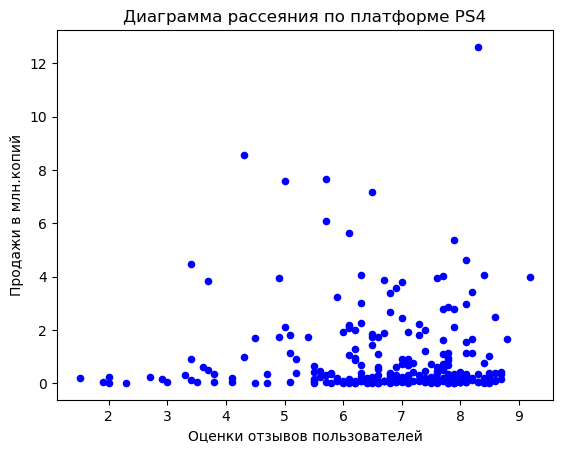

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

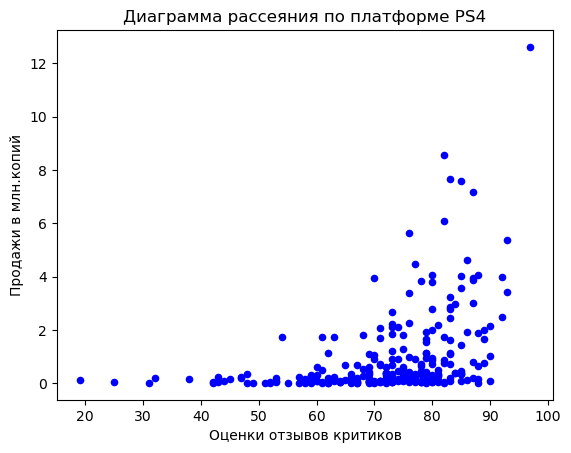

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score     0.000942
total_sales    1.000000
Name: total_sales, dtype: float64

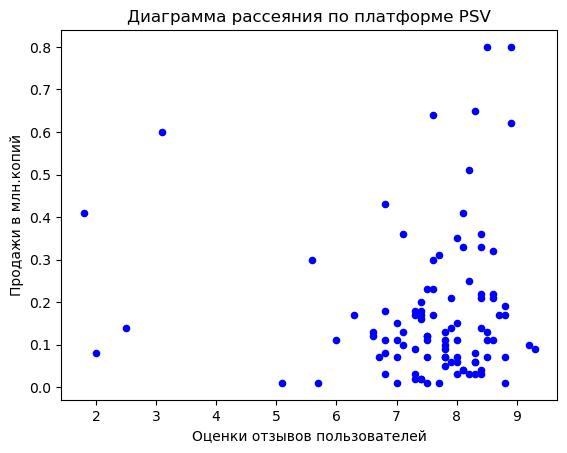

critic_score    0.254742
total_sales     1.000000
Name: total_sales, dtype: float64

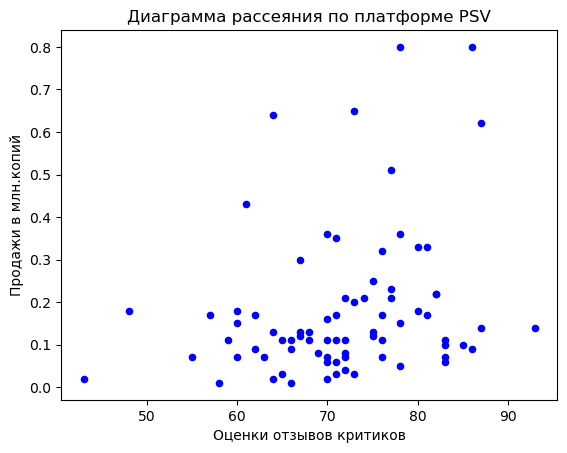

Расчет по Платформе Wii


user_score     0.682942
total_sales    1.000000
Name: total_sales, dtype: float64

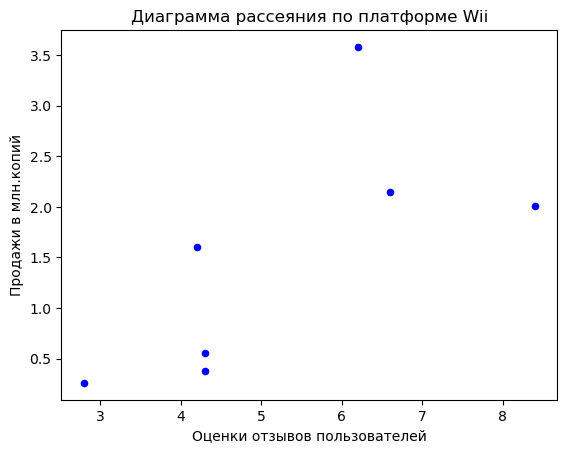

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.41933
total_sales    1.00000
Name: total_sales, dtype: float64

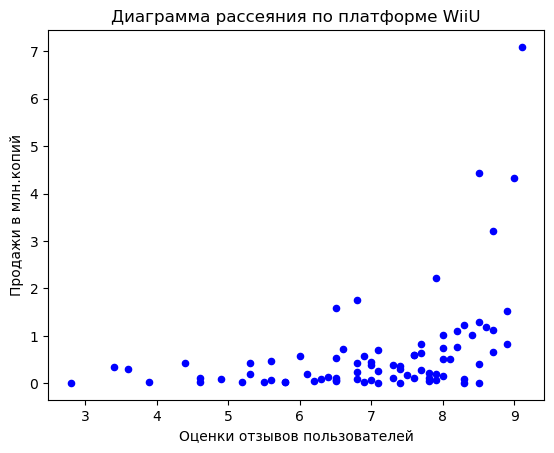

critic_score    0.376415
total_sales     1.000000
Name: total_sales, dtype: float64

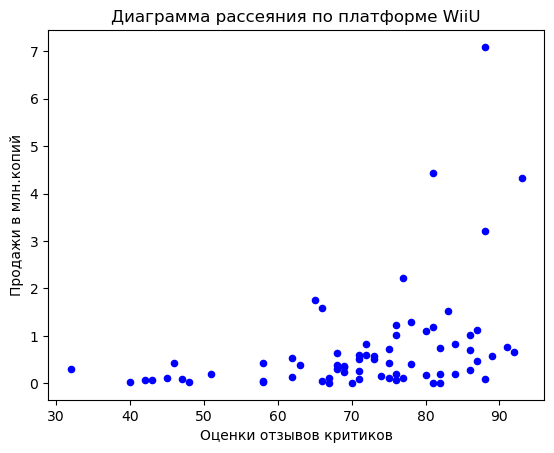

Расчет по Платформе X360


user_score    -0.011742
total_sales    1.000000
Name: total_sales, dtype: float64

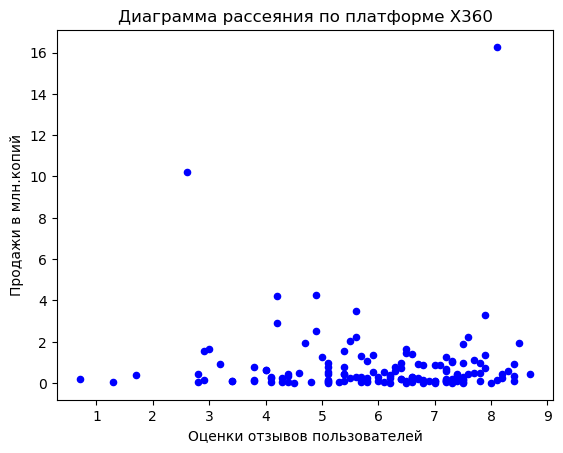

critic_score    0.350345
total_sales     1.000000
Name: total_sales, dtype: float64

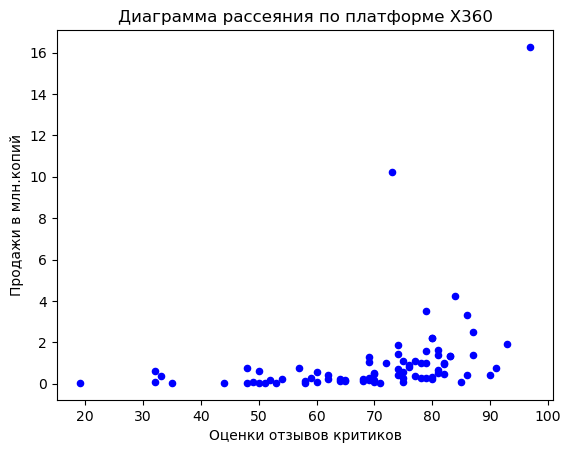

Расчет по Платформе XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

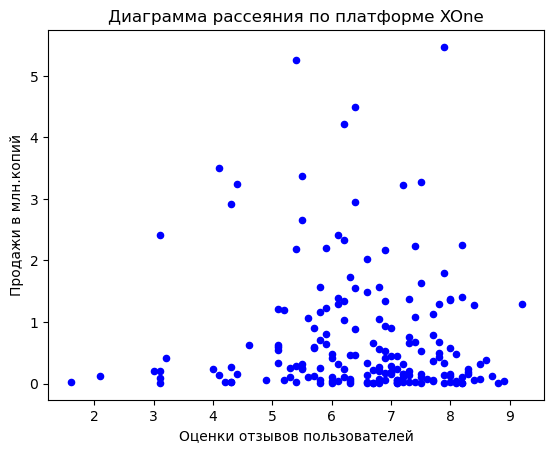

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

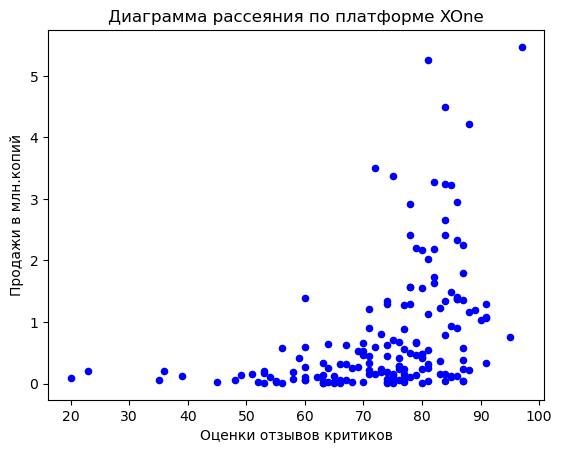

In [93]:
import matplotlib.pyplot as plt
df_sc, y = new_data.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

**Вывод:** 
для всех платформ чем выше пользовательская оценка и оценка критиков, тем больше продажи. Рост продаж резко увеличивается при оценке критиков выше 60 и оценке пользователей выше 6. Также выше продажи для игры с более взрослым рейтингом, кроме платформы WiiU, где популярнее детский контент. Оценить платформу платформу PSP невозможно из-за пропусков в данных в оцнке

**Рассмотрим общее распределение игр по жанрам**

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [94]:
genre_counts = new_data.groupby('genre')['name'].count().sort_values()
genre_counts

genre
Puzzle           17
Strategy         56
Simulation       62
Platform         74
Fighting         80
Racing           85
Misc            155
Shooter         187
Sports          214
Adventure       245
Role-Playing    292
Action          766
Name: name, dtype: int64

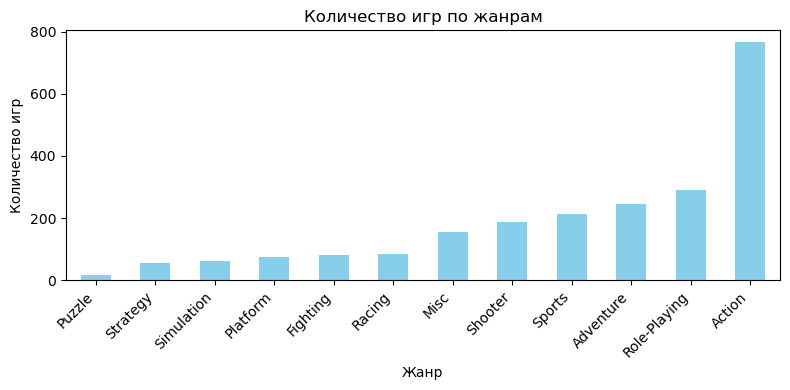

In [95]:
#график количества игр в каждом жанре
plt.figure(figsize=(8, 4))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('Количество игр по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Наибольшее количество игр в жанре: Action(766); Role-Playing(292); Adventure(245); Sports(214); Shooter(187). При этом разрыв между жанром  Action и всеми остальными выглядит гигантским.

In [96]:
genre_sum = new_data.groupby('genre')['total_sales'].sum().sort_values()
genre_sum

genre
Puzzle            3.17
Strategy         10.08
Simulation       21.76
Adventure        23.64
Fighting         35.31
Racing           39.89
Platform         42.63
Misc             62.82
Role-Playing    145.89
Sports          150.65
Shooter         232.98
Action          321.87
Name: total_sales, dtype: float64

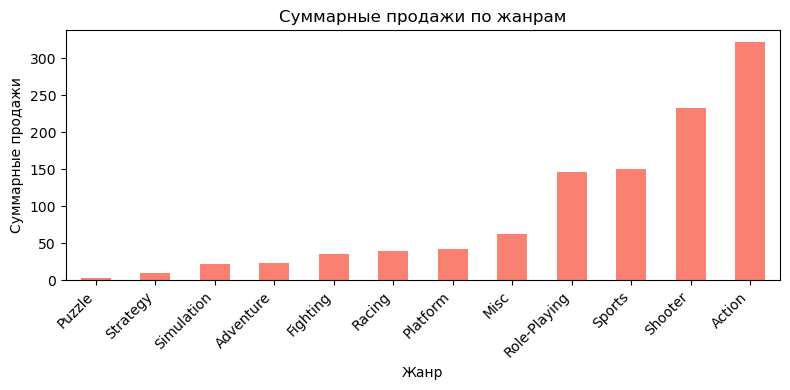

In [97]:
plt.figure(figsize=(8, 4))
genre_sum.plot(kind='bar', color='salmon')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Наибольшие суммарные продажи по жанрам: Action(321.87); Shooter(232.98); Sports(150.65); Role-Playing(145.89); Misc(62.82). Отметим отрыв топ-4 жанра от всех остальных.

По суммарным продажам лидируют жанры Action, Shooter, Sports и Role-Playing, в то время как по количеству игр больше всего выпущено игр в жанрах Action, Role-Playing, Adventure и Sports.
Это может быть связано с более высокой популярностью среди пользователей и более успешными проектами в этих категориях. Также на это влияет качество игр и популярность в жанровых предпочтениях пользователей.

Жанры с большим количеством игр, но с меньшими продажами, могут иметь менее стабильный спрос или конкурентное преимущество на рынке.




Добавим сравнение медианных продаж, так как максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.

In [98]:
genre_median = new_data.groupby('genre')['total_sales'].median().sort_values()

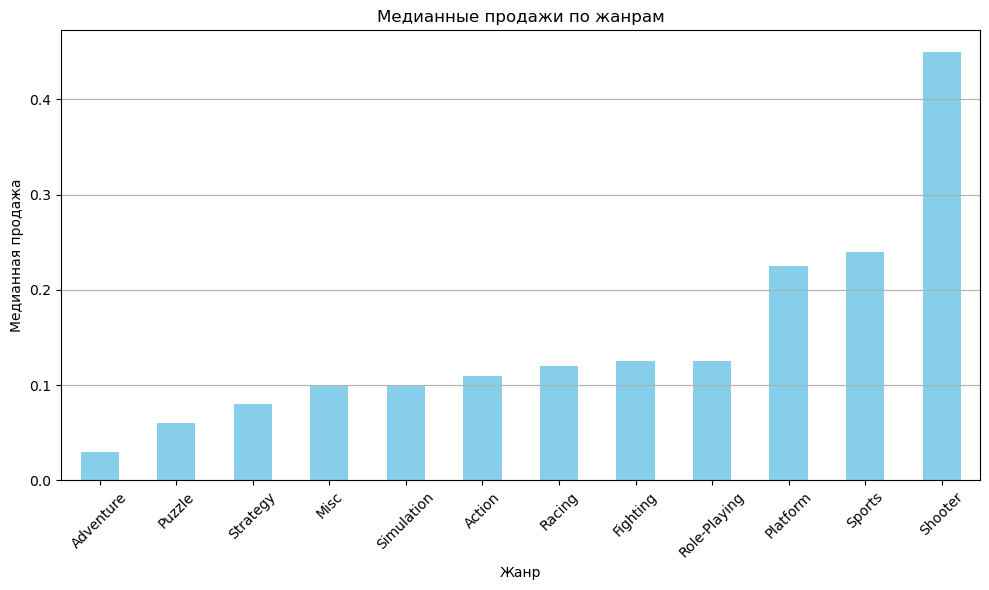

In [99]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
genre_median.plot(kind='bar', color='skyblue')
plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианная продажа')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [100]:
#Создадим датафрейм только с жанрами
data_by_genre = new_data[new_data['genre'].isin(genre_sum.index)]

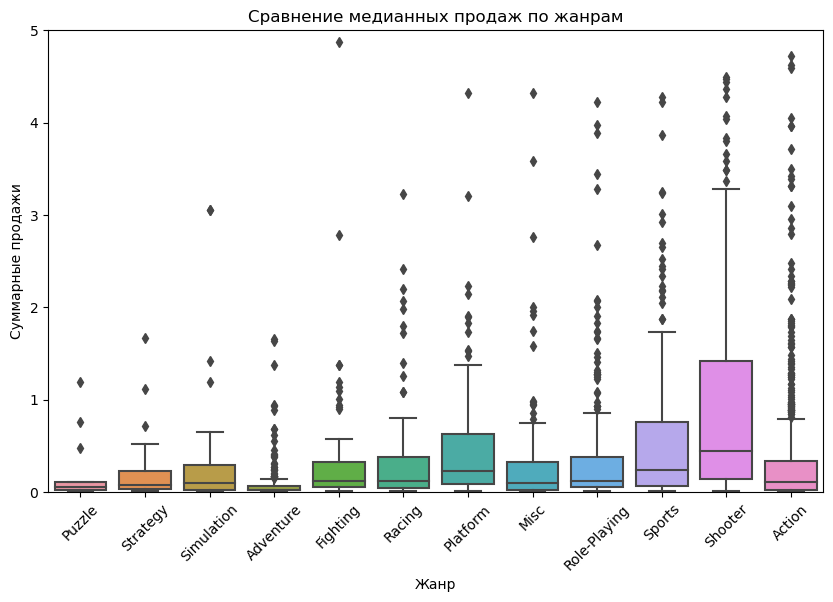

In [101]:
#Создадим диаграмму размаха для сравнения суммарных продаж по жанрам
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='total_sales', data=data_by_genre, order=genre_sum.index)
plt.title('Сравнение медианных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)  #Поворот меток оси x для удобства чтения
plt.ylim(0, 5)  #Ограничение оси y для лучшей видимости
plt.show()

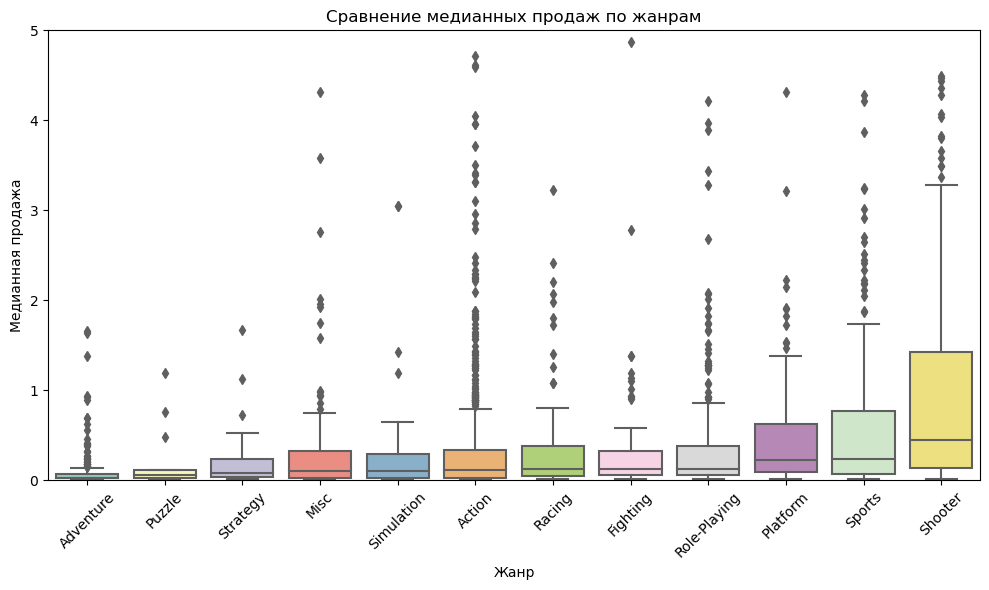

In [102]:
#Вычисление медианных продаж по жанрам
median_sales_by_genre = new_data.groupby('genre')['total_sales'].median().sort_values()

#Создадим диаграмму размаха для сравнения суммарных продаж по жанрам
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='total_sales', data=new_data, order=median_sales_by_genre.index, palette='Set3')
plt.xticks(rotation=45) #Поворот меток оси x 
plt.ylim(0, 5)
plt.title('Сравнение медианных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианная продажа')
plt.tight_layout()
plt.show()

**Вывод:**

Виден рост количества выпущенных игр со временем. В 1980 году в наших данных всего 9 игр. Пик числа игр был в 2008-2011 годах: 2008 году 1427 игр; 2009 году 1426 игр; 2010 году 1255игр. Значительный рост количества заметен в период после 1994 года и 2002 года. 

Топ-5 платформ по количеству игр: PS2(2127); DS(2121); PS3(1306); Wii(1286); X360(1232). 
Платформы с наибольшими суммарными продажами: PS2(1233.56); X360(961.24); PS3(931.34); Wii(891.18); DS(802.78)


В среднем, популярные платформы живут около 8-10 лет, с пиком выпуска игр в середине жизненного цикла. Старые платформы утрачивают актуальность при выходе новых. 
Для текущих стратегий и решений важны данные за последние годы. Взглянем на данные с 2013 года, так как это период выхода новых топ-платформ. После обновления в 2013 году ежегодно растет кол-во игр для PS4 и XOne, а а для остальных плаформ количество игры постепенно ежегодно снижается.

Топ-5 платформ по количеству игр с 2013 года: PS4(392); PSV(PS Vita 358); PS3(345);3DS(303); XOne(247).
Рассматривая количество игр среди топ платформ можно отметить смену поколений платформ. 
В период с 2013 по 2016 наибольшая прибыль на платформах PS4, X360, XOne, Wii, PS3. Также можно отметить, что наибольшее количество выбросов, то есть каких-то наиболее популярных или более дорогих игр на платформах PS4, XOne, PS3, 3DS, X360. 
 
Корреляция между отзывами и продажами на PS4 низкая (0.33). Отзывы критиков влияют на продажи в Японии и частично в Северной Америке.

По суммарным продажам лидируют жанры Action, Shooter, Sports и Role-Playing, в то время как по количеству игр больше всего выпущено игр в жанрах Action, Role-Playing, Adventure и Sports. Жанры игр Shooter(0.45) и Sports(0.24) выделяются среди прочих по высоким медианным продажам, что подтверждает их стабильный коммерческий успех и популярность среди игроков, в то время как жанры Adventure, Puzzle и Strategy демонстрируют более низкие медианные продажи, указывая на менее выраженный коммерческий потенциал. Такая разница может быть связана с тем, что одна платформа со одной игрой в данном жанре имела большой успех, а на остальные провалились.

В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.

<a id="4"></a> 
# 4. Портрет пользователя каждого региона

**Рассмотрим самые популярные платформы (топ-5). Опишите различия в долях продаж**

In [103]:
#группируем данные по платформам и сумме продаж для каждого региона
na_platform_sales = new_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = new_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = new_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

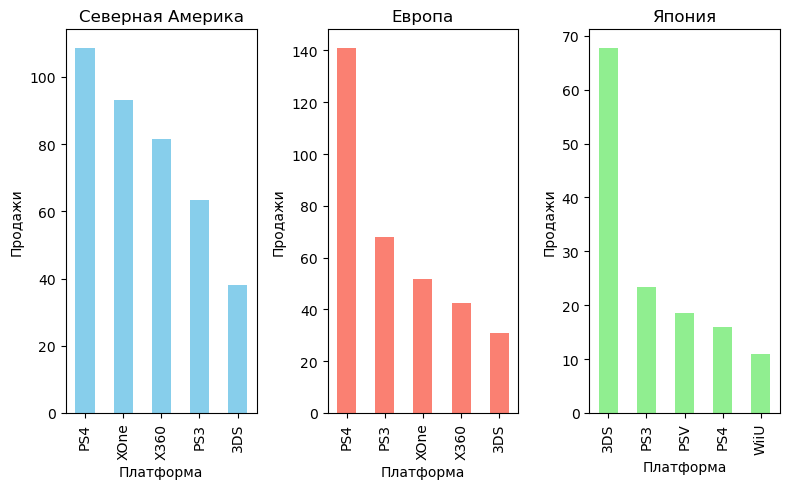

In [104]:
#построим график топ-5 платформ для каждого региона
plt.figure(figsize=(8, 5))

plt.subplot(131)
na_platform_sales.head(5).plot(kind='bar', color='skyblue')
plt.title('Северная Америка')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.subplot(132)
eu_platform_sales.head(5).plot(kind='bar', color='salmon')
plt.title('Европа')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.subplot(133)
jp_platform_sales.head(5).plot(kind='bar', color='lightgreen')
plt.title('Япония')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.tight_layout()
plt.show()

В Северной Америке наиболее продаваемые платформы - PS4, XOne и X360, в Европе - PS4, PS3 и XOne, а в Японии - 3DS, PS3 и PSV. PS4 пользуется популярностью в Северной Америке и Европе(тут с большим отрывом от остальных), однако предпочтения в Японии сильно отличаются в пользу 3DS (с огромным отрывом) и PS3. Каждый регион имеет свои предпочтения в плане игровых платформ. 

In [105]:
#сводная таблица для суммарных продаж по каждой платформе в регионах
sales_by_region = pd.pivot_table(new_data, index='platform', 
                                 values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
sales_by_region = sales_by_region.sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
sales_by_region

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


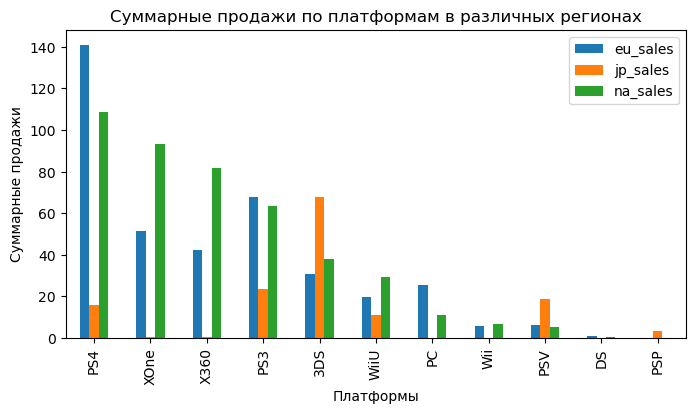

In [106]:
#построим столбчатую диаграмму суммарных продаж по платформам
sales_by_region.plot(kind='bar', figsize=(8, 4))
plt.title('Суммарные продажи по платформам в различных регионах')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.legend(loc='upper right')
plt.show()

Для наглядности посмотрим еще один график круговой диаграммы, который поможет отобразить доли. 

Можно отметить общую любовь к PS4 и PS3 для всех регионов.

Рынки предпочтения платформ Северной Америки и Европы очень похожи.
В Северной Америке и Европе набольшую популярность имеет PS4 и XOne. Совсем нет интереса к PSP. 

Япония полная противополжность и отличается от СА и Европы. В Японии совсем не популярны платформы XOne и X360, а также игры для PC. Нопри этом очень популярны платформы 3DS и PSV 

In [124]:
temp, target = new_data.copy(), 'platform'
list_region = temp.columns[4:7]
for i in range(3):
    df_ = (temp.groupby(target)[list_region[i]].sum().reset_index().
       sort_values(by=list_region[i], ascending=False)[:5])
    df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)
    df_.index =df_[target]
    df_.drop(target, axis= 1 , inplace= True )
    display(df_)

/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/3355779609.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
Other,52.49


/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/3355779609.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
Other,58.26


/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/3355779609.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
Other,4.19


/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/2532203792.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()},
/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/2532203792.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()},
/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/2532203792.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()},


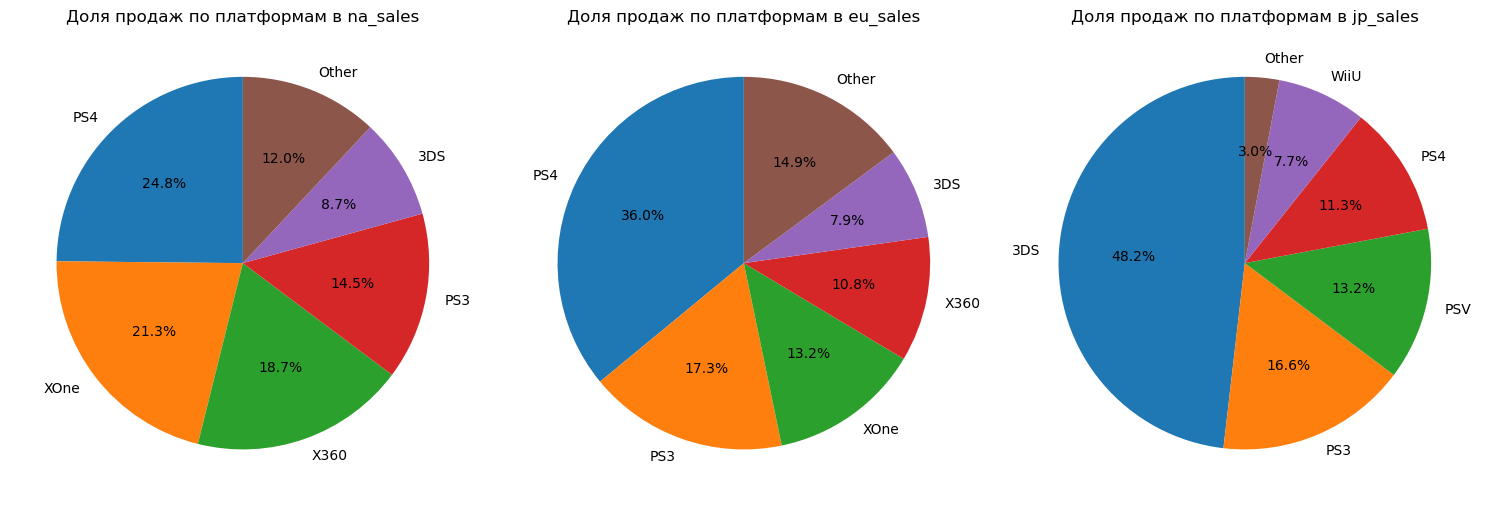

In [123]:
temp, target = new_data.copy(), 'platform'
list_region = temp.columns[4:7]  # Выбираем 3 столбца с продажами по регионам

# Создаем словарь с данными топ-5 платформ + "Other"
region_sales = {}

for region in list_region:
    df_ = (temp.groupby(target)[region].sum().reset_index()
           .sort_values(by=region, ascending=False)[:5])  # Топ-5 платформ

    # Добавляем категорию "Other"
    df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()}, 
                     ignore_index=True)

    # Устанавливаем индекс и сохраняем в словарь
    df_.set_index(target, inplace=True)
    region_sales[region] = df_

# Создаем pie-графики
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, region in enumerate(list_region):
    region_sales[region].plot(kind='pie', y=region, ax=axs[i], autopct='%1.1f%%', 
                              startangle=90, legend=False)
    axs[i].set_title(f'Доля продаж по платформам в {region}')
    axs[i].set_ylabel('')  # Убираем подпись оси

plt.tight_layout()
plt.show()

По долям рынка в целом ситуация не сильно отличается. В целом, PS4 является одной из наиболее популярных платформ во всех регионах, но имеются различия в продажах между Северной Америкой и Европой по сравнению с Японией, где более популярны портативные платформы. 

В Японии существенно выделяется 3DS, на фоне остальных платформ, таких как PS3, PSV, PS4 и WiiU. PS4 имеет меньшие продажи по сравнению с другими регионами.

В Европе PS4 также лидирует, но с более значительным отрывом, за ним идут PS3, XOne, X360 и 3DS, схожий порядок платформ, но с более высокими продажами PS4.

Для Северной Америки топ-5 платформ включает PS4, XOne, X360, PS3 и 3DS. PS4 и XOne имеют близкие продажи, в то время как 3DS значительно отстает от лидеров.

**Самые популярные жанры (топ-5). Поясните разницу.**

In [109]:
#группируем данные по жанру и сумме продаж для каждого региона
na_platform_genre = new_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_platform_genre = new_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_genre = new_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

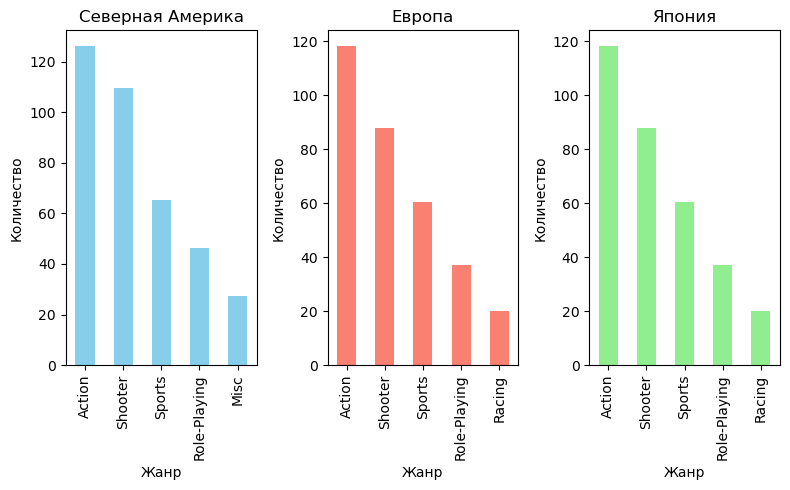

In [110]:
#построим график топ-5 жанров для каждого региона 
plt.figure(figsize=(8, 5))

plt.subplot(131)
na_platform_genre.head(5).plot(kind='bar', color='skyblue')
plt.title('Северная Америка')
plt.xlabel('Жанр')
plt.ylabel('Количество')

plt.subplot(132)
eu_platform_genre.head(5).plot(kind='bar', color='salmon')
plt.title('Европа')
plt.xlabel('Жанр')
plt.ylabel('Количество')

plt.subplot(133)
eu_platform_genre.head(5).plot(kind='bar', color='lightgreen')
plt.title('Япония')
plt.xlabel('Жанр')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

In [111]:
#сводная таблица для суммарных продаж по жанру в регионах
sales_by_genre = pd.pivot_table(new_data, index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
#Сортировка по суммарным продажам в трех регионах
sales_by_genre = sales_by_genre.sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
sales_by_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Role-Playing,36.97,51.04,46.40
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Fighting,8.55,7.65,15.55
Racing,20.19,2.30,12.96
Adventure,8.25,5.82,7.14


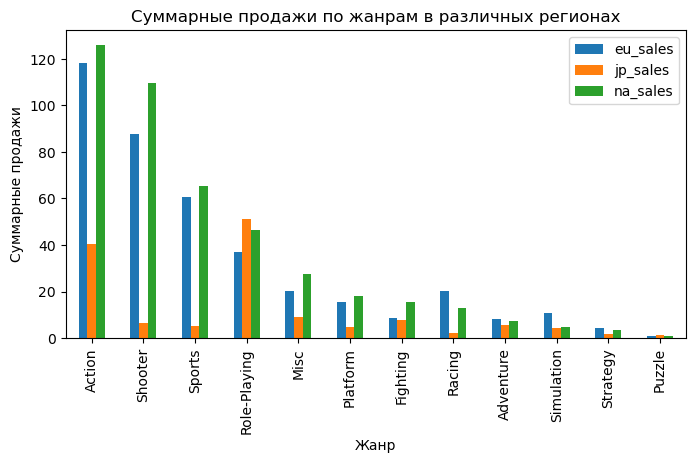

In [112]:
#построим столбчатую диаграмму суммарных продаж по жанрам
sales_by_genre.plot(kind='bar', figsize=(8, 4))
plt.title('Суммарные продажи по жанрам в различных регионах')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.legend(loc='upper right')
plt.show()

In [125]:
temp, target = new_data.copy(), 'genre'
list_region = temp.columns[4:7]
for i in range(3):
    df_ = (temp.groupby(target)[list_region[i]].sum().reset_index().
       sort_values(by=list_region[i], ascending=False)[:5])
    df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)
    df_.index =df_[target]
    df_.drop(target, axis= 1 , inplace= True )
    display(df_)

/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/1410257896.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Other,62.76


/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/1410257896.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Other,68.56


/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/1410257896.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Other,25.79


/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/2754609797.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()},
/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/2754609797.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()},
/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_57150/2754609797.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()},


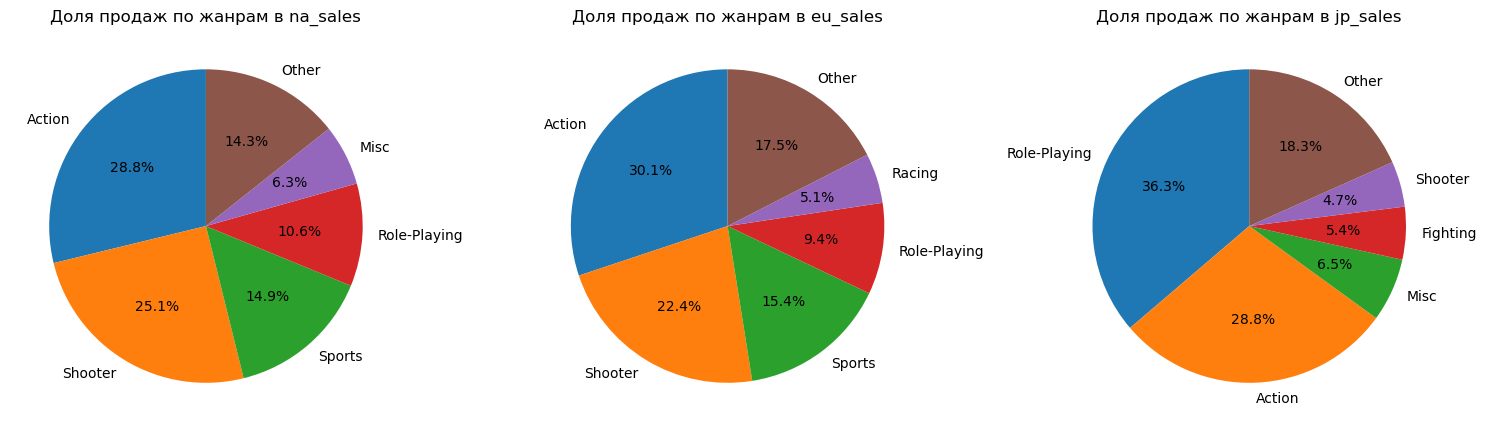

In [135]:
temp, target = new_data.copy(), 'genre'
list_region = temp.columns[4:7]  # Выбираем 3 столбца с продажами по регионам

# Создаем словарь с данными топ-5 платформ + "Other"
region_sales = {}

for region in list_region:
    df_ = (temp.groupby(target)[region].sum().reset_index()
           .sort_values(by=region, ascending=False)[:5])  # Топ-5 платформ

    # Добавляем категорию "Other"
    df_ = df_.append({target: 'Other', region: temp[region].sum() - df_[region].sum()}, 
                     ignore_index=True)

    # Устанавливаем индекс и сохраняем в словарь
    df_.set_index(target, inplace=True)
    region_sales[region] = df_

# Создаем pie-графики
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, region in enumerate(list_region):
    region_sales[region].plot(kind='pie', y=region, ax=axs[i], autopct='%1.1f%%', 
                              startangle=90, legend=False)
    axs[i].set_title(f'Доля продаж по жанрам в {region}')
    axs[i].set_ylabel('')  # Убираем подпись оси

plt.tight_layout()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Тогда на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. Тогда визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
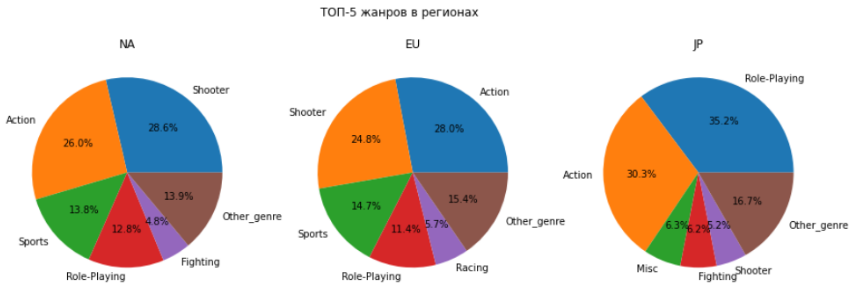

Для Северной Америки и Европы наиболее популярные жанры - Action, Shooter и Sports, причем Action и Shooter лидируют по продажам. Role-Playing также имеет существенные продажи, но не такие высокие, как Action и Shooter.

В Японии самым популярным жанром является Role-Playing, хотя продажи в этом регионе в целом ниже. Здесь также популярны Action и Misc, но в меньшей степени, чем в других регионах.

Общие выводы показывают, что предпочтения по жанрам различаются в разных регионах. Action и Shooter лидируют в Северной Америке и Европе, тогда как в Японии Role-Playing имеет более высокие продажи. В то же время, жанры Misc и Platform не так популярны в Японии, как в других регионах.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [113]:
#исключим значения 'unknown' из данных по рейтингу 
filtered_data = new_data[new_data['rating'] != 'unknown']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При предобработке данных поставлена заглушка на пропуски в рейтинге ESRB и это правильно. Но ее отфильтровали и игры без рейтинга оказываются полностью исключенными из анализа. Продажи именно этих игр могут указать на ключевое различие в регионах. По этому необходимо сделать анализ вместе с заглушкой.</font><br>
<font color='DarkMagenta'>👉 А проблема в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Необходимо это учитывать при предобработке данных.</font>

In [141]:
sales_rating = new_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
sales_rating

,na_sales,eu_sales,jp_sales
rating,,,
M,165.21,145.32,14.11
unknown,89.42,78.91,85.05
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
T,49.79,41.95,20.59


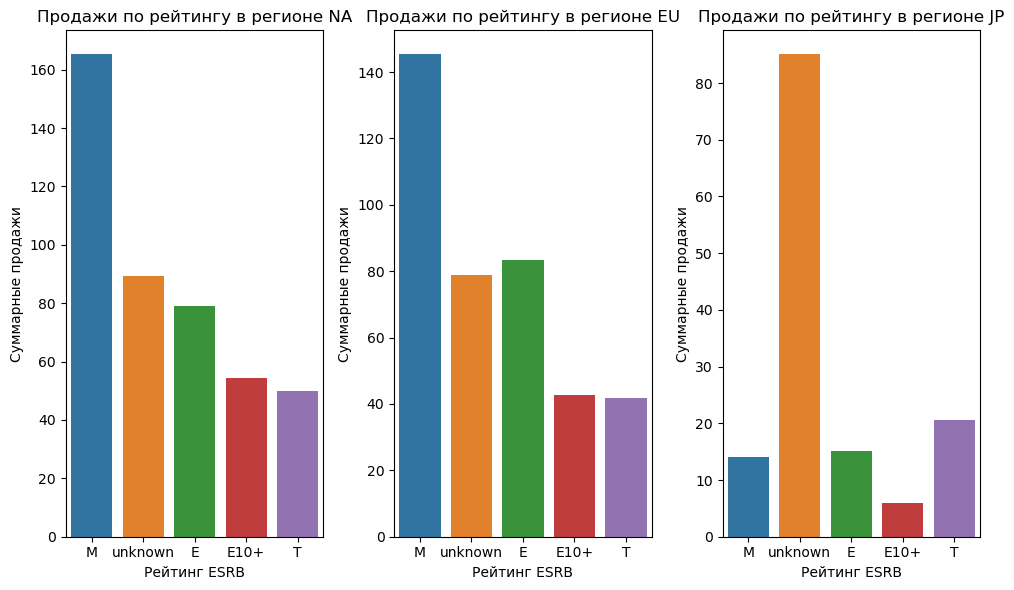

In [133]:
#построим столбчатую диаграмму для продаж по каждому региону и каждому рейтингу ESRB
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=sales_rating.index, y='na_sales', data=sales_rating)
plt.title('Продажи по рейтингу в регионе NA')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')

plt.subplot(1, 3, 2)
sns.barplot(x=sales_rating.index, y='eu_sales', data=sales_rating)
plt.title('Продажи по рейтингу в регионе EU')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')

plt.subplot(1, 3, 3)
sns.barplot(x=sales_rating.index, y='jp_sales', data=sales_rating)
plt.title('Продажи по рейтингу в регионе JP')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')

plt.tight_layout()
plt.show()

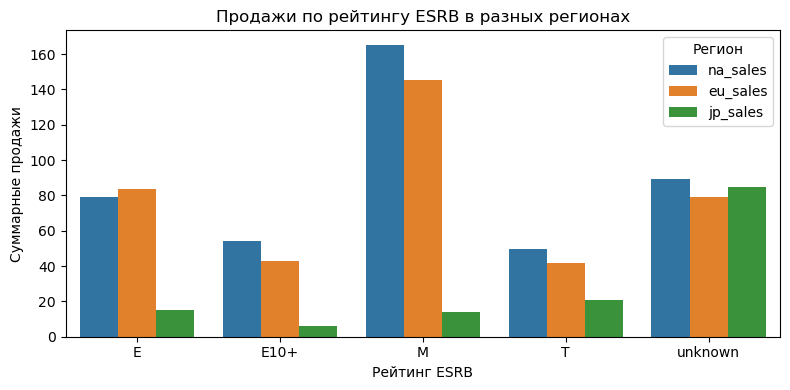

In [134]:
# Создание сводной таблицы с суммарными продажами по рейтингу ESRB в каждом регионе
sales_rating = new_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Перевод данных в "длинный" формат для корректной визуализации
sales_by_rating_melted = pd.melt(sales_rating, id_vars='rating', var_name='region', value_name='total_sales')

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
sns.barplot(x='rating', y='total_sales', hue='region', data=sales_by_rating_melted)
plt.title('Продажи по рейтингу ESRB в разных регионах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

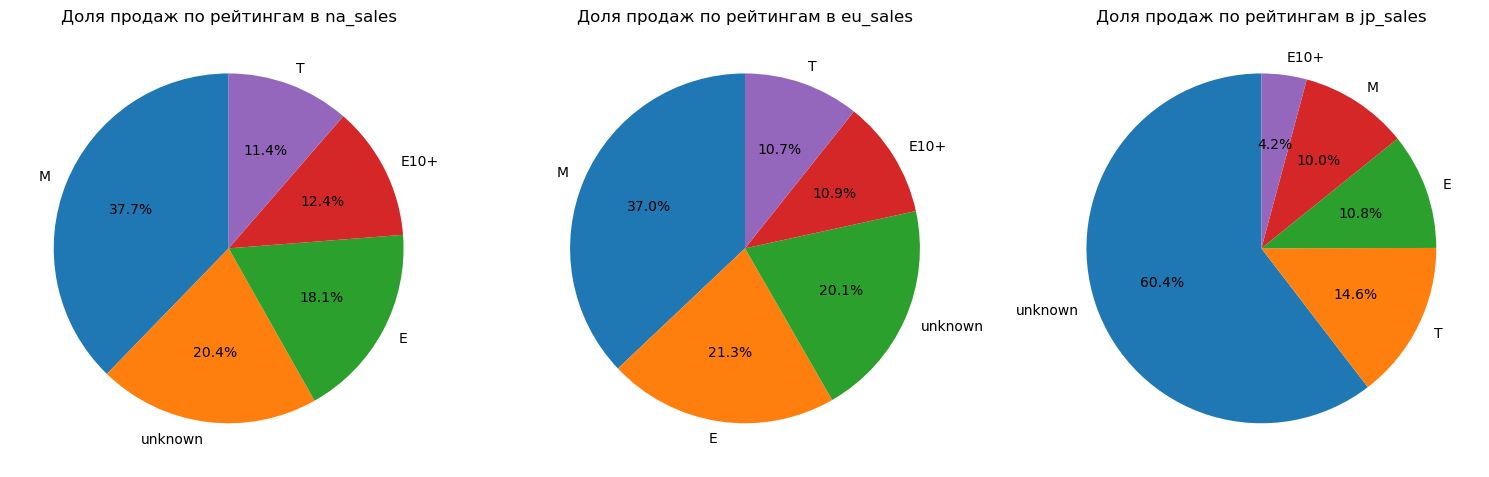

In [146]:
# Копируем агрегированные данные
temp = sales_rating.copy()
list_region = temp.columns  # Берем все 3 региона

# Создаем словарь для хранения данных по регионам
region_sales = {}

for region in list_region:
    # Берем топ-5 рейтингов по продажам в регионе
    df_ = temp[[region]].sort_values(by=region, ascending=False).head(5)

    # Добавляем "Other", если сумма оставшихся данных положительная
    other_value = temp[region].sum() - df_[region].sum()  # Убираем `.values[0]`
    if other_value > 0:
        df_.loc['Other'] = other_value

    # Сохраняем в словарь
    region_sales[region] = df_

# Создаем pie-графики
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, region in enumerate(list_region):
    region_sales[region].plot(kind='pie', y=region, ax=axs[i], autopct='%1.1f%%', 
                              startangle=90, legend=False)
    axs[i].set_title(f'Доля продаж по рейтингам в {region}')
    axs[i].set_ylabel('')  # Убираем подпись оси

plt.tight_layout()
plt.show()

Северная Америка и Европа: игры с рейтингом M (для взрослых) имеют наивысшие продажи в обоих регионах. Рейтинги E и E10+ также пользуются значительным спросом, но в целом уступают играм с рейтингом M.

Япония: здесь предпочтения отличаются. Игры с рейтингом T (для подростков) имеют наибольшие продажи, что отличается от тенденции в Северной Америке и Европе, где игры с рейтингом M преобладают.

Общий вывод показывает, что рейтинг ESRB влияет на предпочтения игроков и на продажи в регионах Северной Америке и Европе. Там игры с рейтингом M для взрослых преобладают. В то время как в Японии этого рейтинга нет и предпочтения склоняются к играм без рейтинга и играм для подростков(с рейтингом T 14,7%).

**Вывод:**




По долям рынка в целом ситуация не сильно отличается. В целом, PS4 является одной из наиболее популярных платформ во всех регионах, но имеет различия в продажах между Северной Америкой и Европой по сравнению с Японией, где более популярны портативные платформы. Еще можно отметить общую любовь и к PS3 для всех регионов. Рынки предпочтения платформ Северной Америки и Европы очень похожи. В Северной Америке и Европе набольшую популярность имеет PS4 и XOne. Совсем нет интереса к PSP.
В Японии существенно выделяется 3DS, на фоне остальных платформ, таких как PS3, PSV, PS4 и WiiU. PS4 имеет меньшие продажи по сравнению с другими регионами. В Японии совсем не популярны платформы XOne и X360, а также игры для PC. Но при этом очень популярны платформы 3DS и PSV.
В Европе PS4 также лидирует, но с более значительным отрывом, за ним идут PS3, XOne, X360 и 3DS, схожий порядок платформ, но с более высокими продажами PS4.
Для Северной Америки топ-5 платформ включает PS4, XOne, X360, PS3 и 3DS. PS4 и XOne имеют близкие продажи, в то время как 3DS значительно отстает от лидеров.

Предпочтения по жанрам различаются в разных регионах. Action и Shooter лидируют в Северной Америке и Европе, тогда как в Японии Role-Playing имеет более высокие продажи. В то же время, жанры Misc и Platform не так популярны в Японии, как в других регионах.

Рейтинг ESRB влияет на предпочтения игроков и на продажи в разных регионах. В Северной Америке и Европе (оказывает большее влияние) игры с рейтингом M для взрослых преобладают, в то время как в Японии на предпочтения рейтинг не влияет, а на втором месте по популярности игры для подростков(с рейтингом T 14,7%).

<a id="5"></a> 
# 5. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**Нулевая гипотеза (H0):** cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза (H1):** cредние пользовательские рейтинги платформ Xbox One и PC различаются

Соберем данные о пользовательских рейтингах для каждой платформы

In [117]:
#Извлечение необходимых данных
data_xo = new_data[new_data['platform'] == 'XOne']['user_score'].dropna()
data_pc = new_data[new_data['platform'] == 'PC']['user_score'].dropna()

Применим статистический тест для определения различий между выборками

In [118]:
#Проведем t-тест для независимых выборок
alpha = 0.05  # Уровень значимости
result = stats.ttest_ind(data_xo, data_pc, equal_var=False)


print(result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги для Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значимых различий в средних пользовательских рейтингах.")

0.14759594013430466
Не отвергаем нулевую гипотезу: Нет значимых различий в средних пользовательских рейтингах.


Имея p-value больше выбранного уровня значимости alpha, мы не имеем статистически значимых доказательств для отвержения нулевой гипотезы. Это означает, что у нас недостаточно оснований считать, что средние пользовательские рейтинги для платформ Xbox One и PC различаются.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

**Нулевая гипотеза (H0):** cредние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза (H1):** cредние пользовательские рейтинги жанров Action и Sports различаются

In [119]:
#Извлечение необходимых данных рейтингов по жанрам Action и Sports
user_ratings_action = new_data[new_data['genre'] == 'Action']['user_score'].dropna()
user_ratings_sports = new_data[new_data['genre'] == 'Sports']['user_score'].dropna()

Применим статистический тест для определения различий между выборками

In [120]:
#Проверка гипотезы
alpha = 0.05  # Уровень значимости

results = stats.ttest_ind(user_ratings_action, user_ratings_sports)
p_value = results.pvalue

print(p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значимых различий в средних пользовательских рейтингах жанров Action и Sports.")

1.0517832389140023e-27
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.


Имея p-value меньше выбранного уровня значимости alpha, мы имеем статистически значимые доказательства для отвержения нулевой гипотезы. Это означает, что у нас достаточно оснований считать, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Вывод:**
таким образом, средние пользовательские рейтинги различаются для жанров Action и Sports, но не различаются между платформами Xbox One и PC.

Выбор t-критерия было обусловлено тем, что данный метод подходит для сравнения средних значений двух независимых выборок. В данном случае мы имеем две разные платформы (Xbox One и PC) и две выборки пользовательских рейтингов для каждой из них. Нулевая гипотеза (H0) обычно представляет собой утверждение о том, что нет статистически значимых различий между группами или переменными. В данном случае, для сравнения средних пользовательских рейтингов платформ Xbox One и PC.

Выборки для жанров Action и Sports собраны с целью сравнения пользовательских рейтингов игр в этих жанрах, а t-критерий применен для оценки различий между средними значениями пользовательских рейтингов в этих двух жанрах. Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые. Это означает, что любые наблюдаемые различия в средних рейтингах жанров Action и Sports объясняются случайностью или шумом. Альтернативная гипотеза (H1): высказывает предположение о том, что между группами есть различия. В данном случае, альтернативная гипотеза утверждает, что средние пользовательские рейтинги жанров Action и Sports различаются.

<a id="6"></a> 
# 6. Общий вывод

**1. Изучили общую информацию.** 
Датасет содержит 16715 строк. Датасет содержит пропуски в столбцах Name(2 шт),Genre(2 шт), Year_of_Release, Critic_Score, User_Score, Rating. Нужно подробнее рассмотреть тип даннных в столбцах Year_of_Release и в столбцах с рейтингами Critic_Score и User_Score.

**2. Подготовили данные.** удалили небольшое количество пропусков в столбцах name и year_of_release. Большое количество пропусков в столбцах critic_score, user_score оставили, а в столбце rating заполнили зглушкой 'unknown'. Пропуски, вероятно, связаны с тем, что наши данные из открытых источников. Также это может быть из-за того, что на некоторые игры нет экспертной оценки, рейтинга(еще и определенной организации) или пользовательской оценки.
Чаще всего выходили игры который получали рейтинг от организации ESRB: E 3990 игр; T 2961 игры; M 1563 игры.

**3. Исследовательский анализ данных (EDA)**

Виден рост количества выпущенных игр со временем. В 1980 году в наших данных всего 9 игр. Пик числа игр был в 2008-2011 годах: 2008 году 1427 игр; 2009 году 1426 игр; 2010 году 1255игр. Значительный рост количества заметен в период после 1994 года и 2002 года.

Топ-5 платформ по количеству игр: PS2(2127); DS(2121); PS3(1306); Wii(1286); X360(1232). Платформы с наибольшими суммарными продажами: PS2(1233.56); X360(961.24); PS3(931.34); Wii(891.18); DS(802.78)

В среднем, популярные платформы живут около 8-10 лет, с пиком выпуска игр в середине жизненного цикла. Старые платформы утрачивают актуальность при выходе новых. Для текущих стратегий и решений важны данные за последние годы. Взглянем на данные с 2013 года, так как это период выхода новых топ-платформ. После обновления в 2013 году ежегодно растет кол-во игр для PS4 и XOne, а а для остальных плаформ количество игры постепенно ежегодно снижается.
Топ-5 платформ по количеству игр с 2013 года: PS4(392); PSV(PS Vita 358); PS3(345);3DS(303); XOne(247). Рассматривая количество игр среди топ платформ можно отметить смену поколений платформ. В период с 2013 по 2016 наибольшая прибыль на платформах PS4, X360, XOne, Wii, PS3. Также можно отметить, что наибольшее количество выбросов, то есть каких-то наиболее популярных или более дорогих игр на платформах PS4, XOne, PS3, 3DS, X360. При этом топ по медианным значениям выглядит точно также, меняются местами только платформы X360 и PS4

Корреляция между отзывами и продажами на PS4 низкая (0.33). Отзывы критиков влияют на продажи в Японии и частично в Северной Америке.

**4. Портрет пользователя каждого региона**

Виден рост количества выпущенных игр со временем. В 1980 году в наших данных всего 9 игр. Пик числа игр был в 2008-2011 годах: 2008 году 1427 игр; 2009 году 1426 игр; 2010 году 1255игр. Значительный рост количества заметен в период после 1994 года и 2002 года.

Топ-5 платформ по количеству игр: PS2(2127); DS(2121); PS3(1306); Wii(1286); X360(1232). Платформы с наибольшими суммарными продажами: PS2(1233.56); X360(961.24); PS3(931.34); Wii(891.18); DS(802.78)

В среднем, популярные платформы живут около 8-10 лет, с пиком выпуска игр в середине жизненного цикла. Старые платформы утрачивают актуальность при выходе новых. Для текущих стратегий и решений важны данные за последние годы. Взглянем на данные с 2013 года, так как это период выхода новых топ-платформ. После обновления в 2013 году ежегодно растет кол-во игр для PS4 и XOne, а а для остальных плаформ количество игры постепенно ежегодно снижается.

Топ-5 платформ по количеству игр с 2013 года: PS4(392); PSV(PS Vita 358); PS3(345);3DS(303); XOne(247). Рассматривая количество игр среди топ платформ можно отметить смену поколений платформ. В период с 2013 по 2016 наибольшая прибыль на платформах PS4, X360, XOne, Wii, PS3. Также можно отметить, что наибольшее количество выбросов, то есть каких-то наиболее популярных или более дорогих игр на платформах PS4, XOne, PS3, 3DS, X360.

Корреляция между отзывами и продажами на PS4 низкая (0.33). Отзывы критиков влияют на продажи в Японии и частично в Северной Америке.

По суммарным продажам лидируют жанры Action, Shooter, Sports и Role-Playing, в то время как по количеству игр больше всего выпущено игр в жанрах Action, Role-Playing, Adventure и Sports. Жанры игр Shooter(0.45) и Sports(0.24) выделяются среди прочих по высоким медианным продажам, что подтверждает их стабильный коммерческий успех и популярность среди игроков, в то время как жанры Adventure, Puzzle и Strategy демонстрируют более низкие медианные продажи, указывая на менее выраженный коммерческий потенциал. Такая разница может быть связана с тем, что одна платформа со одной игрой в данном жанре имела большой успех, а на остальные провалились.


**5. Проверка гипотез** 

Cредние пользовательские рейтинги различаются для жанров Action и Sports, но не различаются между платформами Xbox One и PC.

Выбор t-критерия был обусловлен тем, что данный метод подходит для сравнения средних значений двух независимых выборок. В данном случае мы имеем две разные платформы (Xbox One и PC) и две выборки пользовательских рейтингов для каждой из них. Нулевая гипотеза (H0) обычно представляет собой утверждение о том, что нет статистически значимых различий между группами или переменными. В данном случае, для сравнения средних пользовательских рейтингов платформ Xbox One и PC.

Выборки для жанров Action и Sports собраны с целью сравнения пользовательских рейтингов игр в этих жанрах, а t-критерий применен для оценки различий между средними значениями пользовательских рейтингов в этих двух жанрах. Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые. Это означает, что любые наблюдаемые различия в средних рейтингах жанров Action и Sports объясняются случайностью или шумом. Альтернативная гипотеза (H1): высказывает предположение о том, что между группами есть различия. В данном случае, альтернативная гипотеза утверждает, что средние пользовательские рейтинги жанров Action и Sports различаются.

**6. Рекомендации**

Стоит уделить внимание различиям в предпочтениях пользователей по жанрам и платформам для эффективной стратегии продаж и маркетинговых кампаний в разных регионах.

**Фокус на актуальных платформах:** Следует акцентировать внимание на PS4 и XOne, поскольку данные платформы показывают рост количества игр с их выходом в 2013 году.

**Фокус на популярных жанрах:** Жанры Action, Shooter, Sports и Role-Playing являются наиболее успешными по суммарным продажам. Следовательно, стоит уделить особое внимание к играм в этих жанрах.

**Учитывать региональные особенности:** Различия в предпочтениях пользователей в Северной Америке, Европе и Японии стоит учитывать. В Японии отзывы критиков имеют большее значение для продаж, а рейтинг для игр нет. Отличия в предпочтениях на платформах.


